## Introdução

### A fazer
instruções de como rodar


### Importação de blibiotecas

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importação das tabelas

In [348]:
df_1 = pd.read_csv('dataframes/BaseDados_ProjetoINTELI_RG_31JUL24.csv')
df_2 = pd.read_csv('dataframes/BaseDados_ProjetoINTELI_RG_19JUL24.csv')
df_3 = pd.read_csv('dataframes/BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024.csv')

In [349]:
pd.set_option('display.max_rows', 10)


## Tratamento Tabela 1

### Primeira análise da tabela

In [350]:
list(df_1.columns)

['UEN',
 'Veiculo',
 'Cliente',
 'Origem',
 'Segmento',
 'Setor',
 'Ano',
 'Mês',
 'Mês/ano',
 'VL Tabela',
 'Desconto R$',
 'Desc %',
 'Vl Bruto',
 'Vl Liquido Final',
 'IPCA ES',
 'IPCA BR',
 '% Ating. Meta',
 'Taxa Ac. TRI % PIB',
 'CONCATENAR']

### Drop das colunas divergentes das outras tabelas
a coluna 'Mês/ano', seria uma coluna repetida e sem uso na tabela, isso porque temos as colunas 'Mês' e 'ano', que além de estarem separadas estão mais facilitadas para a conversão de formato Time (Data). A Coluna 'CONCATENAR' são muitos dados nulos assim como a coluna '% Ating. Meta'.

In [351]:
df_1 = df_1.drop(columns=['Mês/ano', 'CONCATENAR', '% Ating. Meta'])
df_1 = df_1.rename(columns={'Ano':'ano'})

In [352]:
df_1.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,Taxa Ac. TRI % PIB
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,2022,4,"48.120,00",0,0%,"48.120,00","48.120,00","0,83","1,06","2,7"
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,2022,12,"14.477,00","-5.066,95",-35%,"9.410,05","9.410,05","0,65","0,62",3
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,SERVICOS,PREST DE SERVICOS,2022,4,"4.000,00",0,0%,"4.000,00","4.000,00","0,83","1,06","2,7"
3,Televisão,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2022,12,"33.871,00","-15.239,50",-45%,"18.631,50","18.631,50","0,65","0,62",3
4,Televisão,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,2022,4,"12.980,00",0,0%,"12.980,00","12.980,00","0,83","1,06","2,7"


### Checagem de dados nulos
Temos mesmo com o drop das colunas divergentes vários dados nulos na tabela 1, por isso devemos identificá-los e acharmos alguma forma de preenche-los.

In [353]:
df_1.isna().sum()

UEN                      0
Veiculo                  0
Cliente                  0
Origem                   0
Segmento                 0
                      ... 
Vl Bruto                 0
Vl Liquido Final         0
IPCA ES                  0
IPCA BR                  0
Taxa Ac. TRI % PIB    3067
Length: 16, dtype: int64

Aqui vemos que os dois tipos de setor que estão nulos na tabela 1, são Comércios de acordo com os tipos de classificação possíveis nessa coluna ('Setor').

In [354]:
df_1[df_1['Setor'].isna()]

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,Taxa Ac. TRI % PIB
36839,Rádio,CBN VITORIA,EV COMERCIO DE VEICULOS LTDA,VT - CONTATO - VITÓRIA,OUTROS,NaN,2024,4,"5.634,00","-1.126,80",-20%,"4.507,20","3.605,76","0,43","0,38",NaN
45332,Rádio,RÁDIO MIX VITÓRIA,REFRIGERACAO DUFRIO COMERCIO IMPORTACAO,RN - MERCADO NACIONAL,OUTROS,NaN,2020,4,"15.972,00","-6.388,80",-40%,"9.583,20","7.666,56","-0,09","-0,31","-1,7"


In [355]:
df_1['Setor'].value_counts()

Setor
LOJA VAREJISTA/ATAC              20055
PREST DE SERVICOS                 8439
SERVICOS PUBLICOS                 4000
COMERC.P/ AUTOMOTIVO              3429
CURSO APRENDIZAGEM                3420
                                 ...  
AEREOS / MARITIMOS / FLUVIAIS        2
PRONTO SOCORRO                       1
INSTITUC. PERFUM/FARMACIA            1
PRODUTOS OTICOS/AUDITIVOS            1
CALCADOS                             1
Name: count, Length: 75, dtype: int64

In [356]:
df_1.at[36839, 'Setor'] = 'COMERC.P/ AUTOMOTIVO'
df_1.at[45332, 'Setor'] = 'LOJA VAREJISTA/ATAC'

Agora iremos ordenar a tabela pela data para podermos completar os dados nulos de PIB

In [357]:
df_1 = df_1.sort_values(by=['ano', 'Mês'])
df_1

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,Taxa Ac. TRI % PIB
9,DIGITAL,INTERNET,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2020,1,"270.290,00","-255.544,50",-95%,"14.745,50","14.745,50","0,29","0,21","1,1"
146,Rádio,LITORAL FM SUL,MULTIVIX SERRA - ENSINO PESQUISA E EXTEN,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,2020,1,624,"-187,2",-30%,"436,8","436,8","0,29","0,21","1,1"
147,Rádio,LITORAL FM NOROESTE,MULTIVIX SERRA - ENSINO PESQUISA E EXTEN,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,2020,1,712,"-213,6",-30%,"498,4","498,4","0,29","0,21","1,1"
209,Rádio,LITORAL FM,FUNDO DE PROM. PROP. COLETIVAS DO SHOPPI,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2020,1,"2.730,60","-273,06",-10%,"2.457,54","2.457,54","0,29","0,21","1,1"
222,Rádio,LITORAL FM NORTE,BANCO DO NORDESTE DO BRASIL S/A,RN - MERCADO NACIONAL,MERCADO FINANCEIRO,BANCOS/FINANC.INSTIT,2020,1,"4.212,00","-21,6",-1%,"4.190,40","4.190,40","0,29","0,21","1,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Televisão,PORTAL G1/GE/HOME,GLOBO COMUNICACAO E PARTICIPACOES S/A,MP - MÍDIA PROGRAMÁTICA,EDUCACAO/MEIOS DE COMUNICACAO,MEIOS DE COMUNICACAO,2024,6,"171.057,85",0,0%,"171.057,85","171.057,85","0,05","0,21",NaN
55766,Televisão,TV GAZETA,LOJAS SIPOLATTI COMERCIO E SERVICOS LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2024,6,"526.679,75","-158.003,92",-30%,"368.675,83","211.977,92","0,05","0,21",NaN
55800,Televisão,TV GAZETA,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2024,6,"312.496,00",0,0%,"312.496,00","249.996,80","0,05","0,21",NaN
55825,Televisão,TV GAZETA,REALMAR DISTRIBUIDORA LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2024,6,"569.348,50","-175.174,79",-31%,"394.173,71","315.338,97","0,05","0,21",NaN


In [358]:
df_1 = df_1.fillna(method='ffill')

/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/444633783.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_1 = df_1.fillna(method='ffill')


In [359]:
df_1.isna().sum()

UEN                   0
Veiculo               0
Cliente               0
Origem                0
Segmento              0
                     ..
Vl Bruto              0
Vl Liquido Final      0
IPCA ES               0
IPCA BR               0
Taxa Ac. TRI % PIB    0
Length: 16, dtype: int64

### Arrumar erros de digitação/formatação
A coluna desconto não deve possuir uma porcentagem negativa e sim positiva, então removemos o '-' de todos as porcentagens de desconto

In [360]:
# df.loc[(df['Cliente'] == 'DMA DISTRIBUIDORA SA') & (df['ano'] == 2023) & (df['Mês'] == 1)]
df_1['Desc %'] = df_1['Desc %'].str.replace('-','')


### Apagar linhas duplicadas

In [361]:
df_1.drop_duplicates(inplace=True)
df_1.duplicated().sum()

0

In [362]:
# df_4.drop(columns=['EMPRESA', 'NOME EMPRESA', 'UN', 'VEÍCULO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE', 'SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA', 'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA', 'TÍTULO', 'É PATROCICIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL', 'TIPO MÍDIA', 'DT EVENTO', 'TP PI', '' ])

### Transformação dos tipos de dados númericos de string para integers/números

In [363]:
uen = df_1.sort_values(by=['Cliente', 'Veiculo'])
# uen[uen['Cliente'] == '']

In [364]:
#Limpando a Coluna de Valor liquído e Convertendo colunas de string para número
df_1['Vl Liquido Final'] = df_1['Vl Liquido Final'].str.replace('.', '')
df_1['Vl Liquido Final'] = df_1['Vl Liquido Final'].str.replace(',', '.')
df_1['Vl Bruto'] = df_1['Vl Bruto'].str.replace('.', '')
df_1['Vl Bruto'] = df_1['Vl Bruto'].str.replace(',', '.')
df_1['Desconto R$'] = df_1['Desconto R$'].str.replace('.', '')
df_1['Desconto R$'] = df_1['Desconto R$'].str.replace(',', '.')
df_1['VL Tabela'] = df_1['VL Tabela'].str.replace('.', '')
df_1['VL Tabela'] = df_1['VL Tabela'].str.replace(',', '.')
df_1['IPCA ES'] = df_1['IPCA ES'].str.replace(',', '.')
df_1['IPCA BR'] = df_1['IPCA BR'].str.replace(',', '.')
df_1['Taxa Ac. TRI % PIB'] = df_1['Taxa Ac. TRI % PIB'].str.replace(',', '.')
df_1['Desc %'] = df_1['Desc %'].str.replace('%', '')
#to_numeric
df_1['Vl Liquido Final'] = pd.to_numeric(df_1['Vl Liquido Final'])
df_1['Vl Bruto'] = pd.to_numeric(df_1['Vl Bruto'])
df_1['Desconto R$'] = pd.to_numeric(df_1['Desconto R$'])
df_1['VL Tabela'] = pd.to_numeric(df_1['VL Tabela'])
df_1['IPCA ES'] = pd.to_numeric(df_1['IPCA ES'])
df_1['IPCA BR'] = pd.to_numeric(df_1['IPCA BR'])
df_1['Taxa Ac. TRI % PIB'] = pd.to_numeric(df_1['Taxa Ac. TRI % PIB'])
df_1['Desc %'] = pd.to_numeric(df_1['Desc %'])
df_1['Desc %'] = df_1['Desc %']/100
df_1['ano'] = pd.to_numeric(df_1['ano'])
df_1['Mês'] = pd.to_numeric(df_1['Mês'])

### Tranformação das colunas de Dia, Mês e Ano para formato de Time (Data)

In [365]:
#Criando coluna 'Dia' para poder converter conjuntamente com as colunas 'Mês' e 'ano' para um formato Dataframe
df_1['Dia'] = 1
df_1_to_time = df_1[['ano', 'Mês', 'Dia']].rename(columns={'ano': 'year', 'Mês': 'month', 'Dia': 'day'})
df_1['Data'] = pd.to_datetime(df_1_to_time)
#Apagando as colunas repetidas que já estão presente no Dataframe
df_1.drop(columns=['ano', 'Mês', 'Dia'], inplace=True)
df_1

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,Taxa Ac. TRI % PIB,Data
9,DIGITAL,INTERNET,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,270290.00,-255544.50,0.95,14745.50,14745.50,0.29,0.21,1.1,2020-01-01
146,Rádio,LITORAL FM SUL,MULTIVIX SERRA - ENSINO PESQUISA E EXTEN,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,624.00,-187.20,0.30,436.80,436.80,0.29,0.21,1.1,2020-01-01
147,Rádio,LITORAL FM NOROESTE,MULTIVIX SERRA - ENSINO PESQUISA E EXTEN,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,712.00,-213.60,0.30,498.40,498.40,0.29,0.21,1.1,2020-01-01
209,Rádio,LITORAL FM,FUNDO DE PROM. PROP. COLETIVAS DO SHOPPI,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2730.60,-273.06,0.10,2457.54,2457.54,0.29,0.21,1.1,2020-01-01
222,Rádio,LITORAL FM NORTE,BANCO DO NORDESTE DO BRASIL S/A,RN - MERCADO NACIONAL,MERCADO FINANCEIRO,BANCOS/FINANC.INSTIT,4212.00,-21.60,0.01,4190.40,4190.40,0.29,0.21,1.1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Televisão,PORTAL G1/GE/HOME,GLOBO COMUNICACAO E PARTICIPACOES S/A,MP - MÍDIA PROGRAMÁTICA,EDUCACAO/MEIOS DE COMUNICACAO,MEIOS DE COMUNICACAO,171057.85,0.00,0.00,171057.85,171057.85,0.05,0.21,2.5,2024-06-01
55766,Televisão,TV GAZETA,LOJAS SIPOLATTI COMERCIO E SERVICOS LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,526679.75,-158003.92,0.30,368675.83,211977.92,0.05,0.21,2.5,2024-06-01
55800,Televisão,TV GAZETA,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,312496.00,0.00,0.00,312496.00,249996.80,0.05,0.21,2.5,2024-06-01
55825,Televisão,TV GAZETA,REALMAR DISTRIBUIDORA LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,569348.50,-175174.79,0.31,394173.71,315338.97,0.05,0.21,2.5,2024-06-01


## Tratamento Tabela 2

### Checagem dos dados nulos
e preenchimento dos mesmo conforme a classificação possível do setor

In [366]:
df_2.isna().sum()

UEN                 0
Veiculo             0
Cliente             0
Origem              0
Segmento            0
                   ..
VL Tabela           0
Desconto R$         0
Desc %              0
Vl Bruto            0
Vl Liquido Final    0
Length: 13, dtype: int64

In [367]:
df_2[df_2['Setor'].isna()]

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final
34853,Rádio,CBN VITORIA,EV COMERCIO DE VEICULOS LTDA,VT - CONTATO - VITÓRIA,OUTROS,NaN,2024,4,"5.634,00","-1.126,80",20%,"4.507,20","3.605,76"
56106,Rádio,RÁDIO MIX VITÓRIA,REFRIGERACAO DUFRIO COMERCIO IMPORTACAO,RN - MERCADO NACIONAL,OUTROS,NaN,2020,4,"15.972,00","-6.388,80",40%,"9.583,20","7.666,56"


In [368]:
df_2.at[34853, 'Setor'] = 'COMERC.P/ AUTOMOTIVO'
df_2.at[56106, 'Setor'] = 'LOJA VAREJISTA/ATAC '
df_2.isna().sum()

UEN                 0
Veiculo             0
Cliente             0
Origem              0
Segmento            0
                   ..
VL Tabela           0
Desconto R$         0
Desc %              0
Vl Bruto            0
Vl Liquido Final    0
Length: 13, dtype: int64

In [369]:
df_2.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final
0,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,2020,7,"1.836,00","-1.782,00",97%,54,"43,2"
1,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,2020,12,"3.876,00","-3.762,00",97%,114,"91,2"
2,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,2021,3,"4.284,00","-4.158,00",97%,126,"100,8"
3,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,2021,4,"16.524,00","-16.077,00",97%,447,"357,6"
4,DIGITAL,INTERNET,14.602.987 PRISCILA BORGES WANDEKOKEN,VT - CONTATO - VITÓRIA,SERVICOS,TURISMO/HOTEL/GASTRO,2023,12,355,-253,71%,102,102


### Transformação dos tipos de dados númericos de string para integers/números

In [370]:
#Limpando a Coluna de Valor liquído e Convertendo colunas de string para número
df_2['Vl Liquido Final'] = df_2['Vl Liquido Final'].str.replace('.', '')
df_2['Vl Liquido Final'] = df_2['Vl Liquido Final'].str.replace(',', '.')
df_2['Vl Bruto'] = df_2['Vl Bruto'].str.replace('.', '')
df_2['Vl Bruto'] = df_2['Vl Bruto'].str.replace(',', '.')
df_2['Desconto R$'] = df_2['Desconto R$'].str.replace('.', '')
df_2['Desconto R$'] = df_2['Desconto R$'].str.replace(',', '.')
df_2['VL Tabela'] = df_2['VL Tabela'].str.replace('.', '')
df_2['VL Tabela'] = df_2['VL Tabela'].str.replace(',', '.')
df_2['Desc %'] = df_2['Desc %'].str.replace('%', '')
#to_numeric
df_2['Vl Liquido Final'] = pd.to_numeric(df_2['Vl Liquido Final'])
df_2['Vl Bruto'] = pd.to_numeric(df_2['Vl Bruto'])
df_2['Desconto R$'] = pd.to_numeric(df_2['Desconto R$'])
df_2['VL Tabela'] = pd.to_numeric(df_2['VL Tabela'])
df_2['Desc %'] = pd.to_numeric(df_2['Desc %'])
df_2['Desc %'] = df_2['Desc %']/100
df_2['ano'] = pd.to_numeric(df_2['ano'])
df_2['Mês'] = pd.to_numeric(df_2['Mês'])

### Tranformação das colunas de Dia, Mês e Ano para formato de Time (Data)

In [371]:
#Criando coluna 'Dia' para poder converter conjuntamente com as colunas 'Mês' e 'ano' para um formato Dataframe
df_2['Dia'] = 1
df_2_to_time = df_2[['ano', 'Mês', 'Dia']].rename(columns={'ano': 'year', 'Mês': 'month', 'Dia': 'day'})
df_2['Data'] = pd.to_datetime(df_2_to_time)
#Apagando as colunas repetidas que já estão presente no Dataframe
df_2.drop(columns=['ano', 'Mês', 'Dia'], inplace=True)
df_2

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,Data
0,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,1836.00,-1782.0,0.97,54.00,43.20,2020-07-01
1,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,3876.00,-3762.0,0.97,114.00,91.20,2020-12-01
2,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,4284.00,-4158.0,0.97,126.00,100.80,2021-03-01
3,DIGITAL,INTERNET,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,VT - CONTATO - VITÓRIA,OUTROS,SERVICOS,16524.00,-16077.0,0.97,447.00,357.60,2021-04-01
4,DIGITAL,INTERNET,14.602.987 PRISCILA BORGES WANDEKOKEN,VT - CONTATO - VITÓRIA,SERVICOS,TURISMO/HOTEL/GASTRO,355.00,-253.0,0.71,102.00,102.00,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
56198,Rádio,RÁDIO MIX VITÓRIA,VERANO SPE EMPREEND. IMOBILIARIOS LTDA,VT - CONTATO - VITÓRIA,INDUSTRIA DA CONSTRUCAO,CONSTRUTORAS E IMOB.,2722.00,0.0,0.00,2722.00,2177.60,2022-04-01
56199,Rádio,RÁDIO MIX VITÓRIA,VERANO SPE EMPREEND. IMOBILIARIOS LTDA,VT - CONTATO - VITÓRIA,INDUSTRIA DA CONSTRUCAO,CONSTRUTORAS E IMOB.,9559.00,-4779.5,0.50,4779.50,3823.60,2022-06-01
56200,Rádio,RÁDIO MIX VITÓRIA,VERANO SPE EMPREEND. IMOBILIARIOS LTDA,VT - CONTATO - VITÓRIA,INDUSTRIA DA CONSTRUCAO,CONSTRUTORAS E IMOB.,77.42,0.0,0.00,77.42,61.94,2022-08-01
56201,Rádio,RÁDIO MIX VITÓRIA,WERNECK & BOLSONI LTDA,VT - CONTATO - VITÓRIA,BRINQUEDOS E DIVERSOES,DIVER SOC/CULTURAIS,1358.00,-1018.5,0.75,339.50,339.50,2021-11-01


### Checagem de linhas duplicadas

In [372]:
df_2.duplicated().sum()

0

##  Tratamento Tabela 3

### Tratamento para tirar os Nulos

In [373]:
# Visualização da quantidade de valores nulos em df_3
print('Valores Nulos:\n', df_3.isna().sum())


Valores Nulos:
 UEN                 0
Veiculo             0
Cliente             0
Origem              0
Segmento            0
                   ..
VL Tabela           0
Desconto R$         0
Desc %              0
Vl Bruto            0
Vl Liquido Final    0
Length: 13, dtype: int64


In [374]:
# Visualização das linhas com valores nulos
df_3[df_3['Setor'].isna()]

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final
36839,Rádio,CBN VITORIA,EV COMERCIO DE VEICULOS LTDA,VT - CONTATO - VITÓRIA,OUTROS,NaN,2024,4,"5.634,00","-1.126,80",-20%,"4.507,20","3.605,76"
45332,Rádio,RÁDIO MIX VITÓRIA,REFRIGERACAO DUFRIO COMERCIO IMPORTACAO,RN - MERCADO NACIONAL,OUTROS,NaN,2020,4,"15.972,00","-6.388,80",-40%,"9.583,20","7.666,56"


In [375]:
# Preenchimento dos valores nulos
df_3.at[36839, 'Setor'] = 'COMERC.P/ AUTOMOTIVO'
df_3.at[45332, 'Setor'] = 'LOJA VAREJISTA/ATAC '


### Tratamento de duplicatas

In [376]:
df_3.duplicated().sum()

6

In [377]:
df_3.drop_duplicates(inplace=True)
df_3.duplicated().sum()

0

### Tratando a coluna de desconto, tirando o "-" dos valores

In [378]:
df_3['Desc %'] = df_3['Desc %'].astype(str).str.replace('-','')

### Definindo as colunas que são numéricas e tornando elas de fato números

In [379]:
for column in ['Vl Liquido Final', 'Vl Bruto', 'Desconto R$', 'VL Tabela', 'Desc %']:
        df_3[column] = df_3[column].str.replace('.', '', regex=False) 
        df_3[column] = df_3[column].str.replace(',', '.', regex=False)
        df_3[column] = df_3[column].str.replace('%', '', regex=False)
        df_3[column] = pd.to_numeric(df_3[column])                     

df_3.head(3)

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,2022,4,48120.0,0.00,0,48120.00,48120.00
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,2022,12,14477.0,-5066.95,35,9410.05,9410.05
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,SERVICOS,PREST DE SERVICOS,2022,4,4000.0,0.00,0,4000.00,4000.00


### Tornando todas as informações referentes a data uma coluna só

In [380]:
df_3['Dia'] = 1
df_3_to_time = df_3[['ano', 'Mês', 'Dia']].rename(columns={'ano': 'year', 'Mês': 'month', 'Dia': 'day'})
df_3['Data'] = pd.to_datetime(df_3_to_time)
#Apagando as colunas repetidas que já estão presente no Dataframe
df_3.drop(columns=['ano', 'Mês', 'Dia'], inplace=True)


In [381]:
df_3['UEN'] = df_3['UEN'].str.replace('DIGITAL', 'Digital')

In [382]:
df_3['UEN'].value_counts()

UEN
Televisão    22371
Rádio        22295
Digital      11225
Name: count, dtype: int64

In [383]:
df_3.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,Data
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,48120.0,0.00,0,48120.00,48120.00,2022-04-01
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,14477.0,-5066.95,35,9410.05,9410.05,2022-12-01
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,SERVICOS,PREST DE SERVICOS,4000.0,0.00,0,4000.00,4000.00,2022-04-01
3,Televisão,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,33871.0,-15239.50,45,18631.50,18631.50,2022-12-01
4,Televisão,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,12980.0,0.00,0,12980.00,12980.00,2022-04-01


## Tratamento das tabelas 4 e 5

#### Processamento das tabelas


In [384]:
df_4 = pd.read_csv('dataframes/DadosInternos_RedeGazeta_Inteli v2.csv')
df_5 = pd.read_csv('dataframes/DadosInternos_RedeGazeta_Inteli.csv')

#### Vizualização das colunas das tabelas 
Para entender a similaridade dos parâmetros das tabelas é preciso a vizualização das colunas


In [385]:
# Visualização das colunas das tabelas 4 e 5
print('df_4 columns', df_4.columns)
print('df_5 columns', df_5.columns)

df_4 columns Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA',
       'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL',
       'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO', 'TIPO DE RECEITA', 'TIPO DE RECEITA 2',
       'Unnamed: 38'],
      dtype='object')
df_5 columns Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME 

In [386]:
# Verificação de valores nulos
print('Is na', df_4.isna().sum())
print('Is na', df_5.isna().sum())

Is na EMPRESA                  0
NOME EMPRESA             0
UN                       0
NOME UN                  0
VEÍCULO                  0
                     ...  
VL COMISSÃO              0
VL LÍQUIDO               0
TIPO DE RECEITA          0
TIPO DE RECEITA 2        0
Unnamed: 38          34511
Length: 39, dtype: int64
Is na EMPRESA                  0
NOME EMPRESA             0
UN                       0
NOME UN                  0
VEÍCULO                  0
                     ...  
VL COMISSÃO              0
VL LÍQUIDO               0
TIPO DE RECEITA          0
TIPO DE RECEITA 2        0
t                    32750
Length: 39, dtype: int64


#### Eliminação das colunas irrelevantes para a análise de dados
Após o entendimento das colunas e para evitar deficiência da análise, o próximo passo é a eliminação das colunas com diversos valores nulos

In [387]:
# Eliminação das colunas irrelevantes para a análise de dados
df_4.drop(['TIPO DE RECEITA', 'TIPO DE RECEITA 2','Unnamed: 38'],inplace=True, axis=1)
df_5.drop(['TIPO DE RECEITA', 'TIPO DE RECEITA 2','t'],inplace=True, axis=1)

In [388]:
# Após a retirada das colunas, visualização da quantidade de linhas nas tabelas
print('df_4 len', len(df_4))
print('df_5 len', len(df_5))

df_4 len 41985
df_5 len 41985


In [389]:
# Visualização das colunas após o tratamento
print('df_4.columns:', df_4.columns)
print('df_5.columns:',df_5.columns)

df_4.columns: Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA',
       'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL',
       'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO'],
      dtype='object')
df_5.columns: Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VEND

#### Quantificar dados nulos em cada coluna da tabela 
Inspecionar os dados e coletar quais estão nulos permite o entender quais colunas são pertinentes para a análise

In [390]:
# Quantidade de valores nulos na tabela 4
print('Is na', df_4.isna().sum())

Is na EMPRESA                  0
NOME EMPRESA             0
UN                       0
NOME UN                  0
VEÍCULO                  0
                        ..
VL DESCONTO/ACRÉSCIMO    0
% DESCONTO/ACRÉSCIMO     0
VL BRUTO                 0
VL COMISSÃO              0
VL LÍQUIDO               0
Length: 36, dtype: int64


In [391]:
# Quantidade de valores nulos na tabela 5
print('Is na', df_5.isna().sum())

Is na EMPRESA                  0
NOME EMPRESA             0
UN                       0
NOME UN                  0
VEÍCULO                  0
                        ..
VL DESCONTO/ACRÉSCIMO    0
% DESCONTO/ACRÉSCIMO     0
VL BRUTO                 0
VL COMISSÃO              0
VL LÍQUIDO               0
Length: 36, dtype: int64


#### Quantificar linhas duplicadas
É comum linhas duplicadas em grandes tabelas de dados para evitar overfitting

In [392]:
# Verificando quantas linhas duplicadas tem na tabela df_4
df_4.duplicated().sum()

425

In [393]:
# Verificando quantas linhas duplicadas tem na tabela df_5
df_5.duplicated().sum()

425

In [394]:
# Eliminando linhas duplicadas nas tabelas
df_4.drop_duplicates(inplace=True)
df_5.drop_duplicates(inplace=True)

In [395]:
# Verificação de linhas duplicadas após tratamento
print(df_4.duplicated().sum())
print(df_5.duplicated().sum())

0
0


In [396]:
# Vizualização da quantidade de colunas nas tabelas 4 e 5
print(len(df_4.columns))
print(len(df_5.columns))

36
36


In [397]:
# Vizualização da quantidade de linhas das tabelas
print('df_4 len', len(df_4))
print('df_5 len', len(df_5))

df_4 len 41560
df_5 len 41560


In [398]:
df_4.columns

Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA',
       'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL',
       'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO'],
      dtype='object')

In [399]:
df_5.columns

Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA',
       'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL',
       'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO'],
      dtype='object')

In [400]:
# Vizualização das 5 primeiras linhas da tabela 4
df_4.head()

,EMPRESA,NOME EMPRESA,UN,NOME UN,VEÍCULO,NOME VEÍCULO,MÊS/ANO,AUTORIZAÇÃO,DT AUTORIZAÇÃO,CLIENTE,...,DT FINAL,TIPO MÍDIA,DT EVENTO,TIPO PI,VL TABELA,VL DESCONTO/ACRÉSCIMO,% DESCONTO/ACRÉSCIMO,VL BRUTO,VL COMISSÃO,VL LÍQUIDO
0,1,S/A A GAZETA,1,JORNAL,55,INTERNET - 21,202301,10002,1/5/2023,198714,...,1/31/2023,2022-1224 - CREATOR,12/31/2022,ANTECIPAÇÃO,"4046,69","-406,69","-0,100499",3640,728,2912
1,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10110,1/5/2023,61740,...,9/30/2023,2022-1196 - PROJETO EDUCAR,10/31/2022,ANTECIPAÇÃO,10000,-5000,"-0,5",5000,1000,4000
2,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10111,1/5/2023,214843,...,7/31/2023,AVULSA,?,ANTECIPAÇÃO,1500,-300,"-0,2",1200,0,1200
3,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10112,1/5/2023,65084,...,1/30/2023,AVULSA,?,ANTECIPAÇÃO,4000,-1500,"-0,375",2500,500,2000
4,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10113,1/5/2023,355940,...,1/31/2023,AVULSA,?,ANTECIPAÇÃO,130,"-45,5","-0,35","84,5",0,"84,5"


In [401]:
# Vizualização das 5 primeiras linhas da tabela 5
df_5.head()

,EMPRESA,NOME EMPRESA,UN,NOME UN,VEÍCULO,NOME VEÍCULO,MÊS/ANO,AUTORIZAÇÃO,DT AUTORIZAÇÃO,CLIENTE,...,DT FINAL,TIPO MÍDIA,DT EVENTO,TIPO PI,VL TABELA,VL DESCONTO/ACRÉSCIMO,% DESCONTO/ACRÉSCIMO,VL BRUTO,VL COMISSÃO,VL LÍQUIDO
0,1,S/A A GAZETA,1,JORNAL,55,INTERNET - 21,202301,10002,1/5/2023,198714,...,1/31/2023,2022-1224 - CREATOR,12/31/2022,ANTECIPAÇÃO,"4046,69","-406,69","-0,100499",3640,728,2912
1,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10110,1/5/2023,61740,...,9/30/2023,2022-1196 - PROJETO EDUCAR,10/31/2022,ANTECIPAÇÃO,10000,-5000,"-0,5",5000,1000,4000
2,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10111,1/5/2023,214843,...,7/31/2023,AVULSA,?,ANTECIPAÇÃO,1500,-300,"-0,2",1200,0,1200
3,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10112,1/5/2023,65084,...,1/30/2023,AVULSA,?,ANTECIPAÇÃO,4000,-1500,"-0,375",2500,500,2000
4,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10113,1/5/2023,355940,...,1/31/2023,AVULSA,?,ANTECIPAÇÃO,130,"-45,5","-0,35","84,5",0,"84,5"


## Concatenação das tabelas 4 e 5
Após a validação do tratamento das duas tabelas, é pertinente uni-las

In [402]:
# União das duas tabelas em uma
df_clean2 = pd.concat([df_4, df_5])

Ao concatener, foi somado 41560 linhas duplicadas, o mesmo comprimento das tabelas antes da junção

In [403]:
# Verificação de valores duplicados na tabela concatenada
df_clean2.duplicated().sum()

41560

In [404]:
# Eliminação de todas as linhas duplicadas
df_clean2.drop_duplicates(inplace=True)

In [405]:
# Validação da eliminação dos valores duplicados
df_clean2.duplicated().sum()

0

In [406]:
df_clean2.columns

Index(['EMPRESA', 'NOME EMPRESA', 'UN', 'NOME UN', 'VEÍCULO', 'NOME VEÍCULO',
       'MÊS/ANO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE',
       'RAZÃO SOCIAL CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE',
       'SETOR', 'NOME SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA',
       'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA',
       'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL',
       'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO'],
      dtype='object')

In [407]:
df_clean2['% DESCONTO/ACRÉSCIMO'].describe

<bound method NDFrame.describe of 0        -0,100499
1             -0,5
2             -0,2
3           -0,375
4            -0,35
           ...    
41980            0
41981            0
41982            0
41983            0
41984           -1
Name: % DESCONTO/ACRÉSCIMO, Length: 41560, dtype: object>

#### Conclusão
Os dados da tabela 4 e 5 estão duplicados, uma vez que o a quantidade de valores duplicados é o mesmo que a quantidade de linhas das tabelas

In [408]:
# Visualização das primeiras 5 colunas da tabela concatenada
df_clean2.head()

,EMPRESA,NOME EMPRESA,UN,NOME UN,VEÍCULO,NOME VEÍCULO,MÊS/ANO,AUTORIZAÇÃO,DT AUTORIZAÇÃO,CLIENTE,...,DT FINAL,TIPO MÍDIA,DT EVENTO,TIPO PI,VL TABELA,VL DESCONTO/ACRÉSCIMO,% DESCONTO/ACRÉSCIMO,VL BRUTO,VL COMISSÃO,VL LÍQUIDO
0,1,S/A A GAZETA,1,JORNAL,55,INTERNET - 21,202301,10002,1/5/2023,198714,...,1/31/2023,2022-1224 - CREATOR,12/31/2022,ANTECIPAÇÃO,"4046,69","-406,69","-0,100499",3640,728,2912
1,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10110,1/5/2023,61740,...,9/30/2023,2022-1196 - PROJETO EDUCAR,10/31/2022,ANTECIPAÇÃO,10000,-5000,"-0,5",5000,1000,4000
2,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10111,1/5/2023,214843,...,7/31/2023,AVULSA,?,ANTECIPAÇÃO,1500,-300,"-0,2",1200,0,1200
3,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10112,1/5/2023,65084,...,1/30/2023,AVULSA,?,ANTECIPAÇÃO,4000,-1500,"-0,375",2500,500,2000
4,1,S/A A GAZETA,1,JORNAL,65,INTERNET,202301,10113,1/5/2023,355940,...,1/31/2023,AVULSA,?,ANTECIPAÇÃO,130,"-45,5","-0,35","84,5",0,"84,5"


## Tratamento de dados após concatenar as tabelas
A seguir, mudar o tipo de dado de object para int ou float. Para isso, coletar as colunas específicas

In [409]:
# Coletar apenas colunas que tem valores como números porém tipo de dado como 'object'
df_clean2[['EMPRESA',  'UN', 'VEÍCULO', 'AUTORIZAÇÃO', 'CLIENTE',
       'SETOR', 'SUBSETOR', 'AGÊNCIA', 'CANAL DE VENDA', 'CONTRATO', 'VL TABELA',
       'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO',
       'VL COMISSÃO', 'VL LÍQUIDO']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 41560 entries, 0 to 41984
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EMPRESA                41560 non-null  int64 
 1   UN                     41560 non-null  int64 
 2   VEÍCULO                41560 non-null  int64 
 3   AUTORIZAÇÃO            41560 non-null  int64 
 4   CLIENTE                41560 non-null  int64 
 5   SETOR                  41560 non-null  int64 
 6   SUBSETOR               41560 non-null  int64 
 7   AGÊNCIA                41560 non-null  int64 
 8   CANAL DE VENDA         41560 non-null  int64 
 9   CONTRATO               41560 non-null  int64 
 10  VL TABELA              41560 non-null  object
 11  VL DESCONTO/ACRÉSCIMO  41560 non-null  object
 12  % DESCONTO/ACRÉSCIMO   41560 non-null  object
 13  VL BRUTO               41560 non-null  object
 14  VL COMISSÃO            41560 non-null  object
 15  VL LÍQUIDO             4

In [410]:
# Colunas para mudar o tipo do dado
erase_comma = df_clean2[['VL TABELA', 'VL DESCONTO/ACRÉSCIMO', '% DESCONTO/ACRÉSCIMO', 'VL BRUTO', 'VL COMISSÃO', 'VL LÍQUIDO']]

#### Elimição das vírgulas para converter o tipo do dados
É possível a a mudança do tipo de dado apenas quando os valores das colunas não tiverem vírgulas

In [411]:
# Para cada coluna selecionada, trocar vírgula por ponto
for column in erase_comma.columns:
    df_clean2[column] = df_clean2[column].str.replace(',', '.')
    df_clean2[column] = df_clean2[column].str.replace('-', '')
    df_clean2[column] = pd.to_numeric(df_clean2[column], errors='coerce')

In [412]:
df_clean2['ANO'] = df_clean2['MÊS/ANO'].astype(str).str[:4].astype(int)
df_clean2['MÊS'] = df_clean2['MÊS/ANO'].astype(str).str[4:].astype(int)
df_clean2['DIA'] = 1
df_to_datatime_4 = df_clean2[['ANO', 'MÊS', 'DIA']].rename(columns={'ANO': 'year', 'MÊS': 'month', 'DIA': 'day'})
df_clean2['MÊS/ANO'] = pd.to_datetime(df_to_datatime_4)

#### Verificação da convesão de dados


In [413]:
# Validação da conversão de dados
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41560 entries, 0 to 41984
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EMPRESA                41560 non-null  int64         
 1   NOME EMPRESA           41560 non-null  object        
 2   UN                     41560 non-null  int64         
 3   NOME UN                41560 non-null  object        
 4   VEÍCULO                41560 non-null  int64         
 5   NOME VEÍCULO           41560 non-null  object        
 6   MÊS/ANO                41560 non-null  datetime64[ns]
 7   AUTORIZAÇÃO            41560 non-null  int64         
 8   DT AUTORIZAÇÃO         41560 non-null  object        
 9   CLIENTE                41560 non-null  int64         
 10  RAZÃO SOCIAL CLIENTE   41560 non-null  object        
 11  NOME FANTASIA CLIENTE  41560 non-null  object        
 12  GRUPO CLIENTE          41558 non-null  object        
 13  SETOR 

## Concact Tabela 3 e 1

In [414]:
df_IPCA = df_1[['IPCA BR', 'IPCA ES', 'Taxa Ac. TRI % PIB', 'Data']]
print('Antes do drop_duplicates', df_IPCA.duplicated().sum())
df_IPCA.drop_duplicates(inplace=True)
print('Depois do drop_duplicates',df_IPCA.duplicated().sum())

Antes do drop_duplicates 55837
Depois do drop_duplicates 0


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3864372924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IPCA.drop_duplicates(inplace=True)


In [415]:
df_IPCA.columns

Index(['IPCA BR', 'IPCA ES', 'Taxa Ac. TRI % PIB', 'Data'], dtype='object')

In [416]:
# Alinhamento dos IPCA's com suas respectivas linhas
df = pd.merge(df_3, df_IPCA, on='Data', how='left')

# Organização do Data Frame por Data
df.sort_values(by=['Data'])

# Eliminação de Colunas irrelevantes para a previsão do modelo
df.drop(columns=['Segmento'], inplace=True)

# Visualização dos valores nulos
print('Valores Nulos:', df.isna().sum())

# Eliminação de linhas com valores nulos
df = df.dropna(subset=['Setor'])
df = df.dropna(subset=['Desc %'])

# Verificação de valores duplicados
df[df.duplicated()]
df.drop_duplicates(inplace=True)

Valores Nulos: UEN                   0
Veiculo               0
Cliente               0
Origem                0
Setor                 0
                     ..
Vl Liquido Final      0
Data                  0
IPCA BR               0
IPCA ES               0
Taxa Ac. TRI % PIB    0
Length: 14, dtype: int64


## Concatenação

In [417]:
df_clean2.drop(columns=['EMPRESA', 'NOME EMPRESA', 'UN', 'VEÍCULO', 'AUTORIZAÇÃO', 'DT AUTORIZAÇÃO', 'CLIENTE', 'NOME FANTASIA CLIENTE', 'GRUPO CLIENTE', 'SETOR', 'SUBSETOR', 'NOME SUBSETOR', 'AGÊNCIA', 'NOME AGÊNCIA', 'EQUIPE CV', 'CANAL DE VENDA', 'NOME CANAL DE VENDA', 'TÍTULO', 'É PATROCÍCIO', 'CONTRATO', 'DT INICIAL', 'DT FINAL', 'TIPO MÍDIA', 'DT EVENTO', 'TIPO PI', 'VL COMISSÃO', 'ANO', 'MÊS', 'DIA'], inplace=True)
df_clean2 = df_clean2.rename(columns={'NOME UN': 'UEN', 'NOME VEÍCULO': 'Veiculo', 'MÊS/ANO': 'Data', 
                          'RAZÃO SOCIAL CLIENTE': 'Cliente','NOME SETOR': 'Setor', 'VL TABELA':'VL Tabela', 
                          'VL DESCONTO/ACRÉSCIMO':'Desconto R$', '% DESCONTO/ACRÉSCIMO':'Desc %', 
                          'VL BRUTO':'Vl Bruto', 'VL LÍQUIDO':'Vl Liquido Final'}, copy=False)
print('Columns df_clean2:', df_clean2.columns)


Columns df_clean2: Index(['UEN', 'Veiculo', 'Data', 'Cliente', 'Setor', 'VL Tabela',
       'Desconto R$', 'Desc %', 'Vl Bruto', 'Vl Liquido Final'],
      dtype='object')


In [418]:
# Lista dos valores das Unidades de Negócios
print(df_clean2['UEN'].value_counts())

# Padronizando a escrita das Unidade de Negócios
df_clean2['UEN'].replace('RADIO', 'Rádio', inplace=True)
df_clean2['UEN'].replace('TELEVISAO', 'Televisão', inplace=True)
df_clean2['UEN'].replace('JORNAL', 'Digital', inplace=True)
df_clean2['UEN'].replace('DIGITAL', 'Digital', inplace=True)

# Verificação da Padronização
df_clean2['UEN'].value_counts()

UEN
TELEVISAO    19316
RADIO        14032
JORNAL        8197
DIGITAL         15
Name: count, dtype: int64


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3583192099.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['UEN'].replace('RADIO', 'Rádio', inplace=True)
/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3583192099.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

UEN
Televisão    19316
Rádio        14032
Digital       8212
Name: count, dtype: int64

In [419]:
df_6 = pd.read_csv('dataframes/DadosEconomicos_ES_Inteli.xlsx-VarejoTotal.csv')
df_6 = df_6[df_6['PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)'] != '...']
colunas_numericas = df_6.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for coluna in colunas_numericas:
    Q1 = df_6[coluna].quantile(0.25)
    Q3 = df_6[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    condicao = (df_6[coluna] < limite_inferior) | (df_6[coluna] > limite_superior)
    outliers[coluna] = df_6[condicao]
if any(not df.empty for df in outliers.values()):
    for coluna, df_outlier in outliers.items():
        if not df_outlier.empty:
            styled = df_outlier.style.set_caption(f"Outliers na coluna {coluna}").set_table_styles([{
                'selector': 'caption',
                'props': [('color', 'red'), ('font-size', '16px')]
            }]).highlight_null(color='yellow').background_gradient(cmap='viridis')
            display(styled)
else:
    print("Não foram encontrados outliers em nenhuma coluna.")

Não foram encontrados outliers em nenhuma coluna.


In [420]:
meses_map = {
    'jan.': 'Jan',
    'fev.': 'Feb',
    'mar.': 'Mar',
    'abr.': 'Apr',
    'mai.': 'May',
    'jun.': 'Jun',
    'jul.': 'Jul',
    'ago.': 'Aug',
    'set.': 'Sep',
    'out.': 'Oct',
    'nov.': 'Nov',
    'dez.': 'Dec'
}
# Converter a coluna de data
df_6['Data'] = pd.to_datetime(df_6['Mês'].replace(meses_map, regex=True).str.replace(r'(\w+)-(\d+)', 
                                                       lambda m: f"01-{m.group(1)}-20{m.group(2)}",
                                                       regex=True),
                            format='%d-%b-%Y', errors='coerce')
# Formatar a data no novo formato padrão (YYYY-MM-DD)
df_6['Data'] = df_6['Data'].dt.strftime('%Y-%m-%d')
df_6.head()

,Mês,Tipos de índice,Brasil e Unidade da Federação,PMC - Número-índice (2022=100) (Número-índice),PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice),"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)",Data
2,fev.-00,Índice de volume de vendas no comércio varejista,Brasil,"47,08777","50,59853","0,9",2000-02-01
3,fev.-00,Índice de volume de vendas no comércio varejista,Espírito Santo,"41,91516","43,5982","1,7",2000-02-01
4,mar.-00,Índice de volume de vendas no comércio varejista,Brasil,"49,10081","50,92229","0,6",2000-03-01
5,mar.-00,Índice de volume de vendas no comércio varejista,Espírito Santo,"42,41022","43,41987","-0,4",2000-03-01
6,abr.-00,Índice de volume de vendas no comércio varejista,Brasil,"49,10081","50,96281","0,1",2000-04-01


In [421]:
df_pmc_br = df_6[df_6['Brasil e Unidade da Federação'] == 'Brasil']
df_pmc_es = df_6[df_6['Brasil e Unidade da Federação'] == 'Espírito Santo']
df_pmc_es = df_pmc_es.drop(columns=['Brasil e Unidade da Federação','Tipos de índice', 'Mês'])
df_pmc_br = df_pmc_br.drop(columns=['Brasil e Unidade da Federação','Tipos de índice', 'Data', 'Mês'])


In [422]:
df_pmc_es.rename(columns={'PMC - Número-índice (2022=100) (Número-índice)': 'PMC - Número-índice (2022=100) (Número-índice)/ ES'}, inplace=True)
df_pmc_es.rename(columns={'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)': 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES'}, inplace=True)
df_pmc_es.rename(columns={'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)': 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES'}, inplace=True)
df_pmc_br.rename(columns={'PMC - Número-índice (2022=100) (Número-índice)': 'PMC - Número-índice (2022=100) (Número-índice)/ BR'}, inplace=True)
df_pmc_br.rename(columns={'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)': 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR'}, inplace=True)
df_pmc_br.rename(columns={'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)': 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR'}, inplace=True)
df_pmc_es = df_pmc_es.reset_index() 
df_pmc_br = df_pmc_br.reset_index()
df_combined = pd.concat([df_pmc_es, df_pmc_br], axis=1)
df_combined = df_combined.drop(columns=['index'])

df_combined = df_combined[['PMC - Número-índice (2022=100) (Número-índice)/ ES',
                           'PMC - Número-índice (2022=100) (Número-índice)/ BR',
                           'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES',
                           'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR',
                           'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES',
                           'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR',
                           'Data']]

df_6 = df_combined


In [423]:
df_6['Data'] = pd.to_datetime(df_6['Data'])

In [424]:
df = pd.merge(df, df_6, on='Data', how='left')

In [425]:
erase_comma_df = df[['PMC - Número-índice (2022=100) (Número-índice)/ ES', 'PMC - Número-índice (2022=100) (Número-índice)/ BR', 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES', 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR', 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES', 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR']]

In [426]:
# Para cada coluna selecionada, trocar vírgula por ponto
for column in erase_comma_df.columns:
    df[column] = df[column].str.replace(',', '.')
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [427]:
df.head()

,UEN,Veiculo,Cliente,Origem,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,Data,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,48120.0,0.00,0,48120.00,48120.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,PREST DE SERVICOS,14477.0,-5066.95,35,9410.05,9410.05,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,PREST DE SERVICOS,4000.0,0.00,0,4000.00,4000.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
3,Televisão,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,LOJA VAREJISTA/ATAC,33871.0,-15239.50,45,18631.50,18631.50,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
4,Televisão,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,12980.0,0.00,0,12980.00,12980.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8


## Validação da Tabela 

In [428]:
df_receita = pd.read_csv('dataframes/BASE INTELI_META_OCUP.csv')

In [429]:
df_receita['% Ating. Meta'] = df_receita['% Ating. Meta'].str.replace('%', '')
df_receita['% Ating. Meta'] = pd.to_numeric(df_receita['% Ating. Meta'])
df_receita['% Ating. Meta'] = df_receita['% Ating. Meta']/100

In [430]:
df_receita['Meta'] = df_receita['Meta'].str.replace('.', '')
df_receita['Meta'] = pd.to_numeric(df_receita['Meta'])
df_receita['Receita'] = df_receita['Meta'] * df_receita['% Ating. Meta']

In [431]:
for index, mes in enumerate(df_receita['Mês'].unique()):
    df_receita.loc[df_receita['Mês'] == mes, 'Mês'] = index + 1
df_receita.insert(2, 'Dia', 1)
df_receita['Ano'] = pd.to_numeric(df_receita['Ano'], errors='coerce')
df_receita.rename(columns={'Ano': 'year', 'Mês': 'month', 'Dia': 'day'}, inplace=True)
df_receita.insert(0, 'Data', pd.to_datetime(df_receita[['year', 'month', 'day']]))

In [432]:
from math import sqrt
df.sort_values(['Data'])
df_receita.sort_values(['Data'])
resultados = []
for uen in df['UEN'].unique():
    for data in df['Data'].astype(str).str[:7].unique():
        # Soma das receitas da tabela tratada
        receita_por_veiculo = df.loc[(df['UEN'] == uen) & (df['Data'].astype(str).str[:7] == data), 'Vl Liquido Final'].sum()
        # Receita real por veículo/mês/ano
        receita_por_veiculo_real = df_receita.loc[(df_receita['Uen'] == uen) & (df_receita['Data'].astype(str).str[:7] == data), 'Receita'].values
        # Condição para validar a equivalência dos valores
        resultados.append({
            'Data': data,
            'UEN': uen,
            'Receita Prevista': receita_por_veiculo,
            'Receita Real': np.round(receita_por_veiculo_real, decimals=0),
            'Diferença': np.round(receita_por_veiculo_real - receita_por_veiculo, decimals=0)
        })
df_validacao = pd.DataFrame(resultados)


In [433]:
df_validacao.sort_values(by=['Data']).reset_index().drop(columns=['index'])
df_validacao.sort_values(by=['Data'])

,Data,UEN,Receita Prevista,Receita Real,Diferença
59,2020-01,Rádio,819268.49,[798687.0],[-20582.0]
5,2020-01,Televisão,4212371.91,[4319439.0],[107068.0]
113,2020-01,Digital,362051.13,[504308.0],[142257.0]
131,2020-02,Digital,444191.17,[893628.0],[449437.0]
77,2020-02,Rádio,985286.15,[979552.0],[-5734.0]
...,...,...,...,...,...
128,2024-05,Digital,1166177.68,[1156442.0],[-9736.0]
74,2024-05,Rádio,1059069.03,[1035649.0],[-23420.0]
3,2024-06,Televisão,6314437.75,[5940373.0],[-374065.0]
111,2024-06,Digital,1711436.20,[1668065.0],[-43371.0]


In [434]:
df.head()

,UEN,Veiculo,Cliente,Origem,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,Data,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,48120.0,0.00,0,48120.00,48120.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,PREST DE SERVICOS,14477.0,-5066.95,35,9410.05,9410.05,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,PREST DE SERVICOS,4000.0,0.00,0,4000.00,4000.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
3,Televisão,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,LOJA VAREJISTA/ATAC,33871.0,-15239.50,45,18631.50,18631.50,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
4,Televisão,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,12980.0,0.00,0,12980.00,12980.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8


## Plotagem dos gráficos 

### Definição de coluna Categórica e Numérica

In [435]:
df.head()
categorias = ['Numerico','Categorico']
categorico = df[['UEN','Veiculo','Cliente','Setor','Data']]
numerico = df[['VL Tabela','Desconto R$','Desc %','Vl Bruto','Vl Liquido Final','IPCA ES','IPCA BR','Taxa Ac. TRI % PIB']]

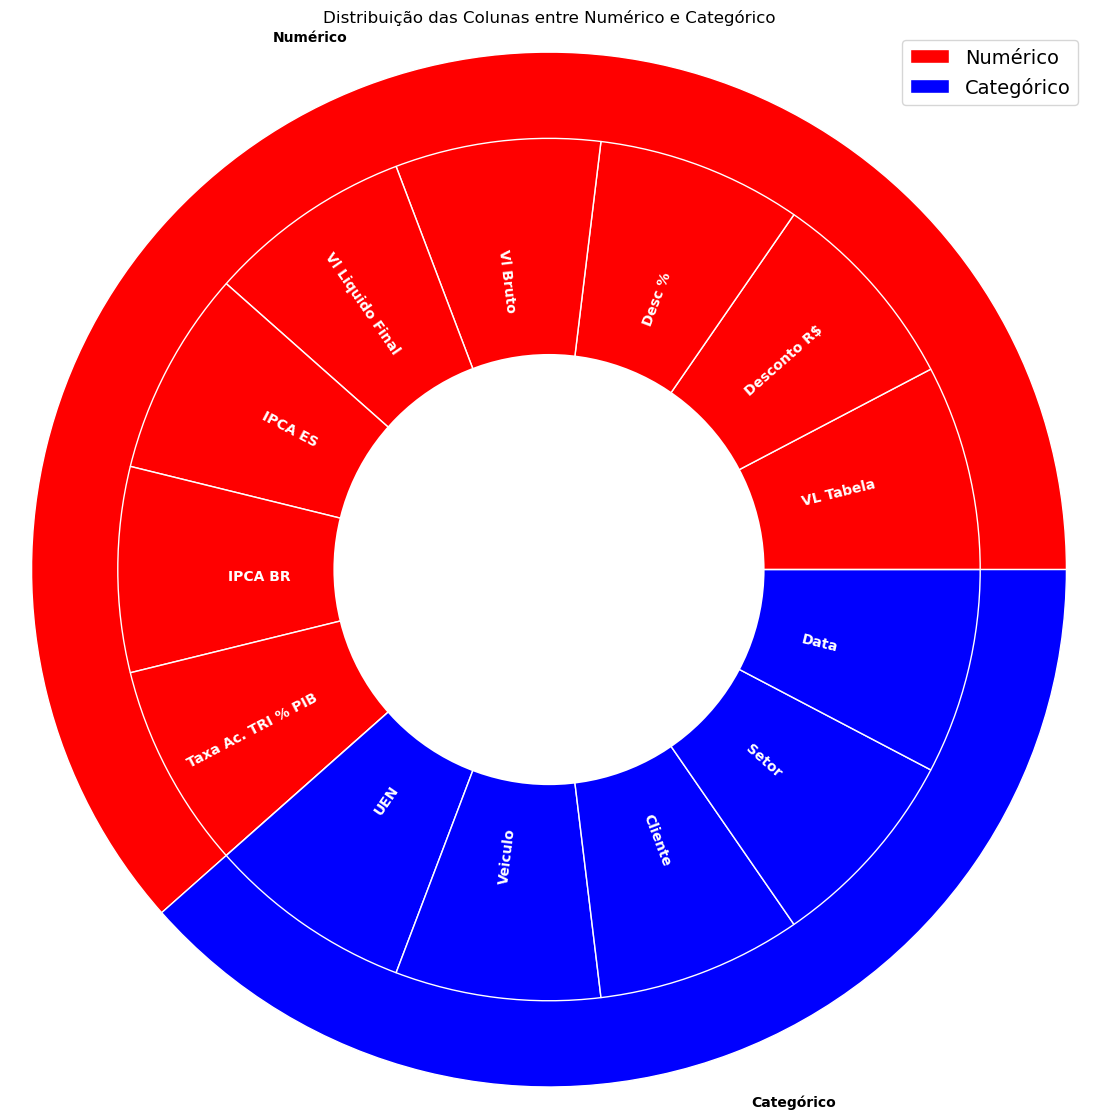

In [436]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Dados para as categorias principais
categorias = ['Numérico', 'Categórico']
valores_categorias = [len(numerico.columns), len(categorico.columns)]

# Dados para as subcategorias
subcategorias = numerico.columns.tolist() + categorico.columns.tolist()
valores_subcategorias = [1] * len(subcategorias)

# Cores para as categorias principais e subcategorias
cores_categorias = ['#FF0000', '#0000FF']  # Vermelho para Numérico, Azul para Categórico
cores_subcategorias = [
    mcolors.to_rgba('#FF0000', alpha=0.6)] * len(numerico.columns) + \
    [mcolors.to_rgba('#0000FF', alpha=0.6)] * len(categorico.columns)

# Tamanho da figura (aumentado para 22 x 14)
fig, ax = plt.subplots(figsize=(22, 14))

# Gráfico das categorias principais
p1 = ax.pie(valores_categorias, 
            radius=1.2,
            labels=categorias,
            wedgeprops=dict(edgecolor='white'),
            colors=cores_categorias,
            textprops=dict(color="black", fontweight="bold"))

# Gráfico das subcategorias (nomes das colunas)
p2 = ax.pie(valores_subcategorias,
            radius=1,  # Aumentando o raio interno para criar mais espaço
            labels=subcategorias,
            autopct=None,
            colors=cores_subcategorias,
            labeldistance=0.6,  # Aumentando a distância do texto para melhorar o encaixe
            wedgeprops=dict(edgecolor='white'), 
            pctdistance=0.75,  
            rotatelabels=True,
            textprops=dict(color="white", fontweight="bold"))

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.5, fc='white')  # Reduzindo o círculo central para mais espaço

# Adiciona o círculo central
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title('Distribuição das Colunas entre Numérico e Categórico')

# Adiciona a legenda
plt.legend(labels=['Numérico', 'Categórico'], loc='upper right', fontsize=14)

plt.show()




In [437]:
df['Desc %'].describe()

count    55891.000000
mean        29.183554
std         23.835819
min          0.000000
25%          0.000000
50%         30.000000
75%         50.000000
max         99.000000
Name: Desc %, dtype: float64

### Plotagem de gráficos de Clientes por frequência
aqui podemos observar que existe um cliente que é muito recorrente, tendo diversas campanhas de publicidade em diferentes veículos num mesmo mês.

In [438]:
#client_counts = df['Cliente'].value_counts()
#top_clients = client_counts.head(20)
#
## Configuração do gráfico
#plt.figure(figsize=(22, 12))
#
## Gerar cores diferentes para cada cliente
#colors = plt.cm.get_cmap('tab20', len(top_clients))
#
## Criar o gráfico de barras
#bars = plt.bar(range(len(top_clients)), top_clients, color=colors(range(len(top_clients))))
#
## Título e rótulos
#plt.title('Top 20 Clientes por Frequência', fontsize=16)
#plt.xlabel('Clientes', fontsize=14)
#plt.ylabel('Contagem de Frequência', fontsize=14)
#plt.xticks(ticks=range(len(top_clients)), labels=['']*len(top_clients), fontsize=12)
#
## Adicionar uma legenda abaixo do gráfico
#plt.legend(bars, top_clients.index, title="Clientes", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize=12)
#
## Ajustar o layout
#plt.tight_layout()
#plt.show()

In [439]:
df[df['Cliente'] == 'SUPERINTENDENCIA ESTADUAL DE COMUNICACAO']

,UEN,Veiculo,Cliente,Origem,Setor,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,Data,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
6,Televisão,GAZETA PRODUCOES,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,11742.0,0.0,0,11742.0,11742.00,2021-12-01,0.73,0.73,4.8,119.56136,122.78603,98.24259,98.54126,1.9,-0.7
26,Televisão,TV GAZETA NORTE,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,34790.0,0.0,0,34790.0,34790.00,2022-07-01,-0.68,-1.31,2.7,101.39470,99.18270,99.73836,99.25370,0.3,-0.6
27,Rádio,GAZETA FM VITÓRIA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,1026.0,0.0,0,1026.0,1026.00,2021-02-01,0.86,1.00,-2.9,82.42783,87.09135,92.31967,98.71772,1.8,0.6
35,Televisão,PORTAL G1/GE/HOME,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,4400.0,0.0,0,4400.0,4400.00,2022-07-01,-0.68,-1.31,2.7,101.39470,99.18270,99.73836,99.25370,0.3,-0.6
40,Televisão,TV GAZETA SUL,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,39892.0,0.0,0,39892.0,39892.00,2022-07-01,-0.68,-1.31,2.7,101.39470,99.18270,99.73836,99.25370,0.3,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55859,Televisão,TV GAZETA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,513861.4,-513.0,0,513348.4,410678.72,2023-03-01,0.71,0.84,3.7,106.02377,100.27768,106.17224,101.85801,5.0,0.8
55884,Televisão,TV GAZETA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,771989.5,0.0,0,771989.5,617591.60,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
55888,Televisão,TV GAZETA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,817507.0,-856.0,0,816651.0,653320.80,2023-12-01,0.56,0.58,2.9,116.66925,124.93641,98.17794,101.95188,-14.0,-1.0
55889,Televisão,TV GAZETA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS PUBLICOS,934789.0,-816.0,0,933973.0,747178.40,2022-06-01,0.67,0.61,2.7,95.30342,96.86423,99.41361,99.80263,-2.2,-3.5


### Plotagem de gráficos de Frequência de um Setor por UEN
aqui podemos observar que existe uma tendência a um determinado setor ser mais predominante naquele UEN

/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3458984201.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_counts = df_counts.groupby('UEN').apply(lambda x: x.nlargest(10, 'counts', keep='all')).reset_index(drop=True)
/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3458984201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Setor', y='counts', data=group_data, palette=palette)


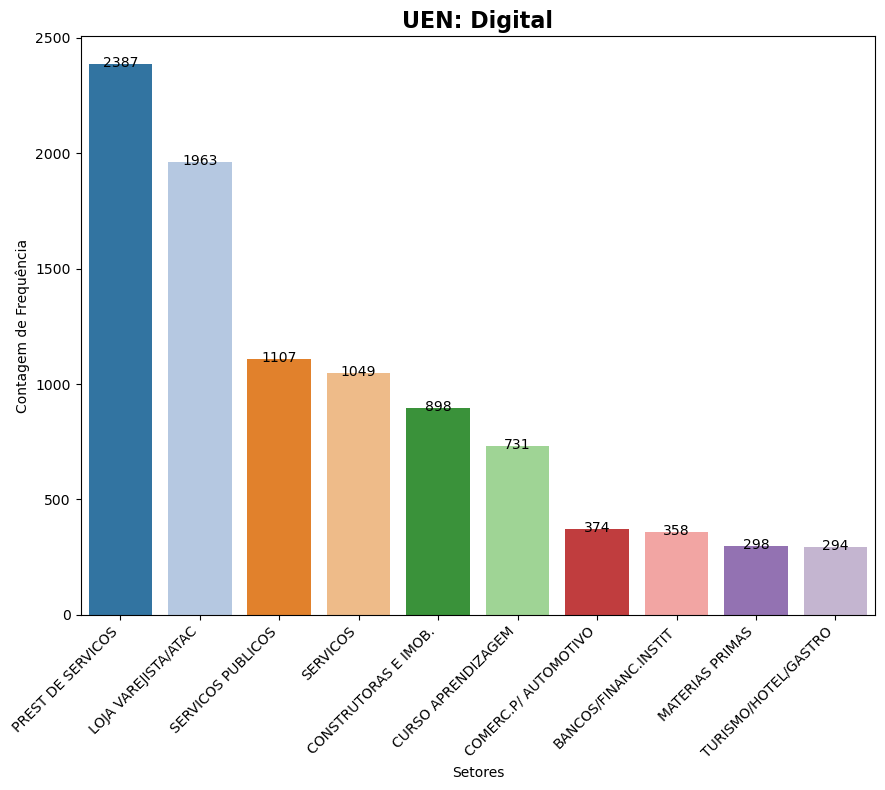

/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3458984201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Setor', y='counts', data=group_data, palette=palette)


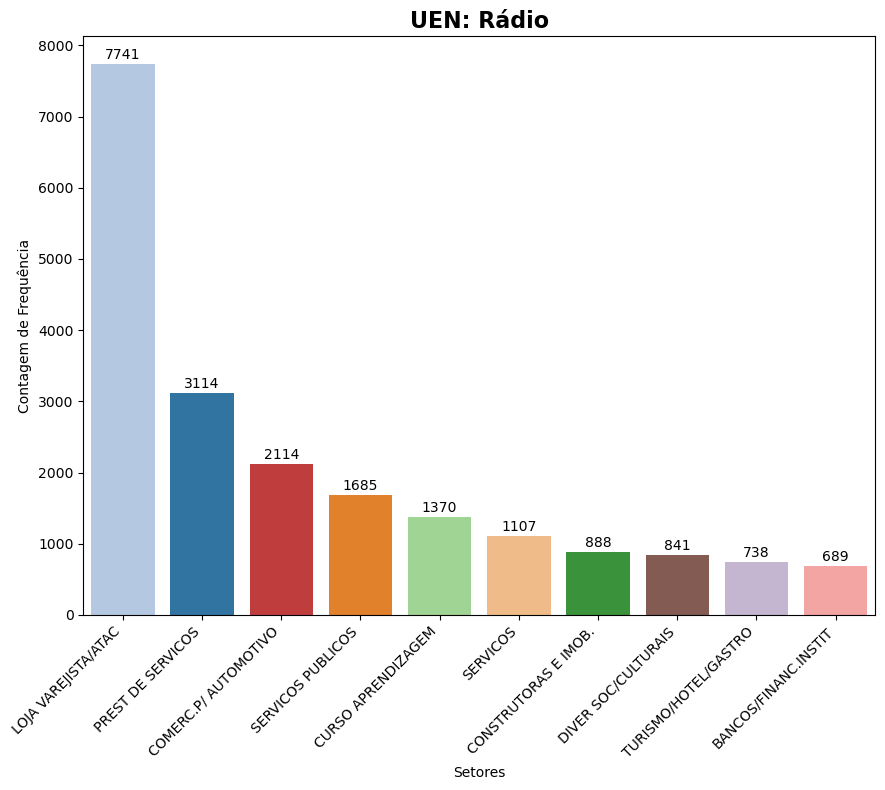

/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/3458984201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Setor', y='counts', data=group_data, palette=palette)


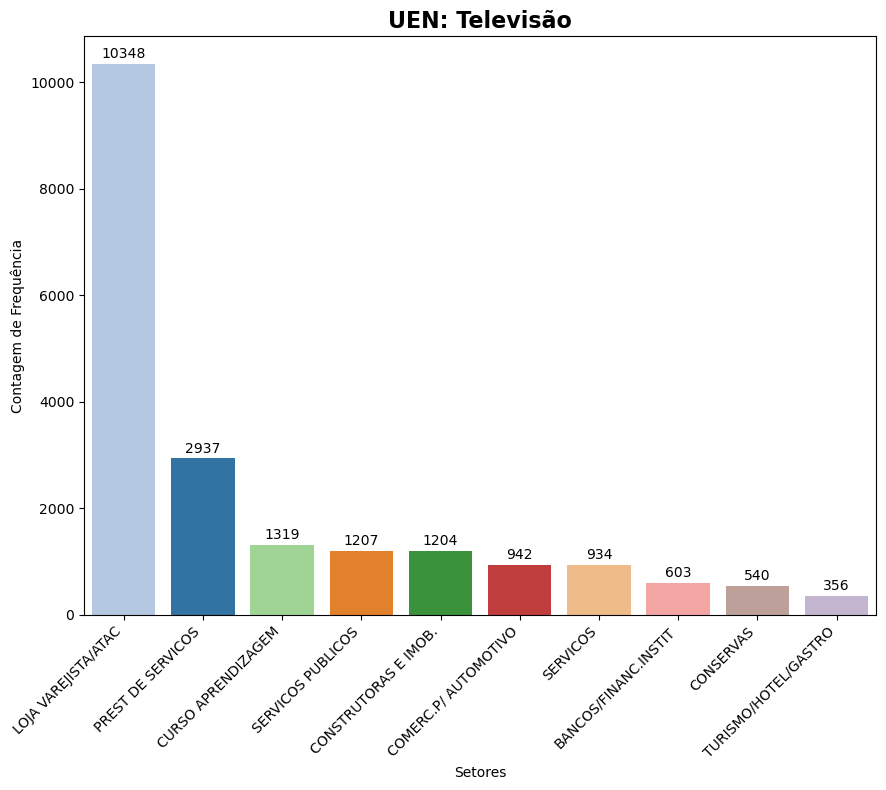

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerando o DataFrame com as contagens para cada UEN e Setor
df_counts = df.groupby(['UEN', 'Setor']).size().reset_index(name='counts')

# Garantindo que cada UEN tenha 10 setores representados, mesmo em caso de empate
df_counts = df_counts.groupby('UEN').apply(lambda x: x.nlargest(10, 'counts', keep='all')).reset_index(drop=True)

# Paleta de cores personalizada para garantir que as cores sejam consistentes entre os gráficos
unique_setores = df_counts['Setor'].unique()
palette = dict(zip(unique_setores, sns.color_palette("tab20", len(unique_setores))))

# Iterando sobre cada UEN e criando um gráfico separado
for uen, group_data in df_counts.groupby('UEN'):
    plt.figure(figsize=(9, 8))
    
    # Criando o gráfico de barras
    ax = sns.barplot(x='Setor', y='counts', data=group_data, palette=palette)
    
    # Adicionando os rótulos em cima das barras
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()-50),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
    
    # Adicionando o nome do Setor abaixo da barra
    ax.set_xticks(range(len(group_data['Setor'])))
    ax.set_xticklabels(group_data['Setor'], rotation=45, ha='right')

    # Configurações adicionais de título e formatação
    ax.set_xlabel('Setores')
    ax.set_ylabel('Contagem de Frequência')
    ax.set_title(f'UEN: {uen}', size=16, weight='semibold')

    # Ajustando o layout
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


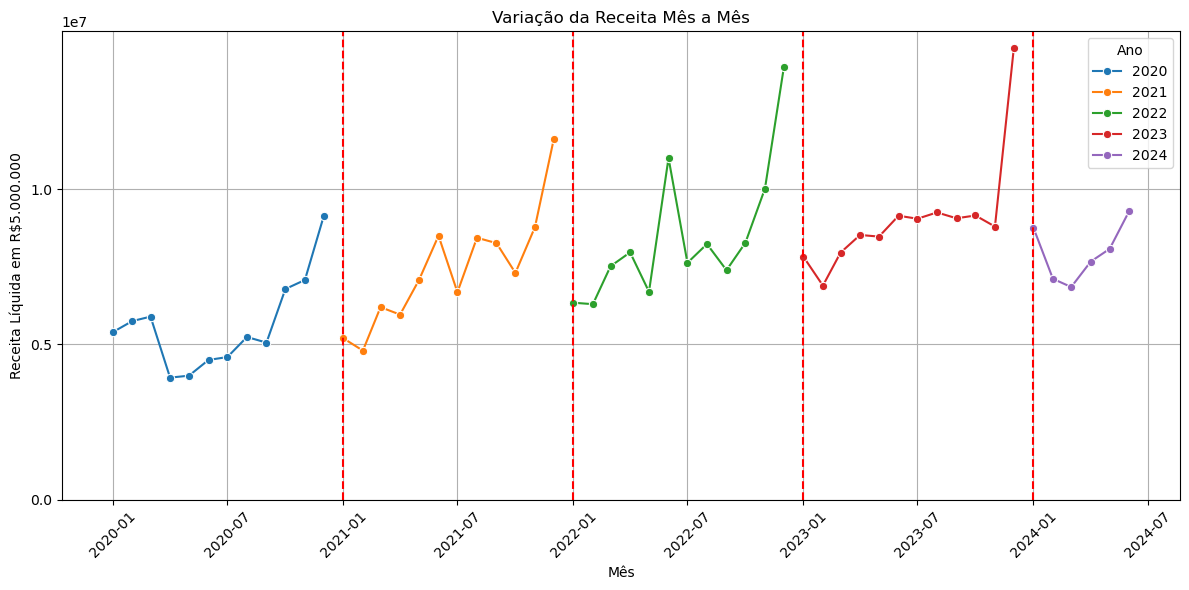

In [441]:
dados = {
    'Mês': [],
    'Receita Líquida': []
}
for mes in df['Data'].astype(str).str[:7].unique():
    receita_mes = df['Vl Liquido Final'].where(df['Data'].astype(str).str[:7] == mes)
    receita_mes_total = receita_mes.sum()
    dados['Mês'].append(mes)
    dados['Receita Líquida'].append(receita_mes_total)
dados = pd.DataFrame(dados)
dados['Mês'] = pd.to_datetime(dados['Mês'], format='%Y-%m')
dados = dados.sort_values('Mês').reset_index(drop=True)
# Adicionando a coluna 'Ano' para facilitar a diferenciação
dados['Ano'] = dados['Mês'].dt.year
# Plotando o gráfico com cores diferentes para cada ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados, x='Mês', y='Receita Líquida', hue='Ano', palette='tab10', marker='o')
# Configurações do gráfico
plt.title('Variação da Receita Mês a Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Líquida em R$5.000.000')
plt.grid(True)
plt.yticks(np.arange(0, dados['Receita Líquida'].max(), 5000000))
plt.xticks(rotation=45)
plt.tight_layout()
# Adicionando as linhas verticais de mudança de ano
for i, row in dados.iterrows():
    if i > 0 and row['Ano'] != dados.loc[i-1, 'Ano']:
        plt.axvline(x=row['Mês'], color='red', linestyle='--')
plt.legend(title='Ano')
plt.show()

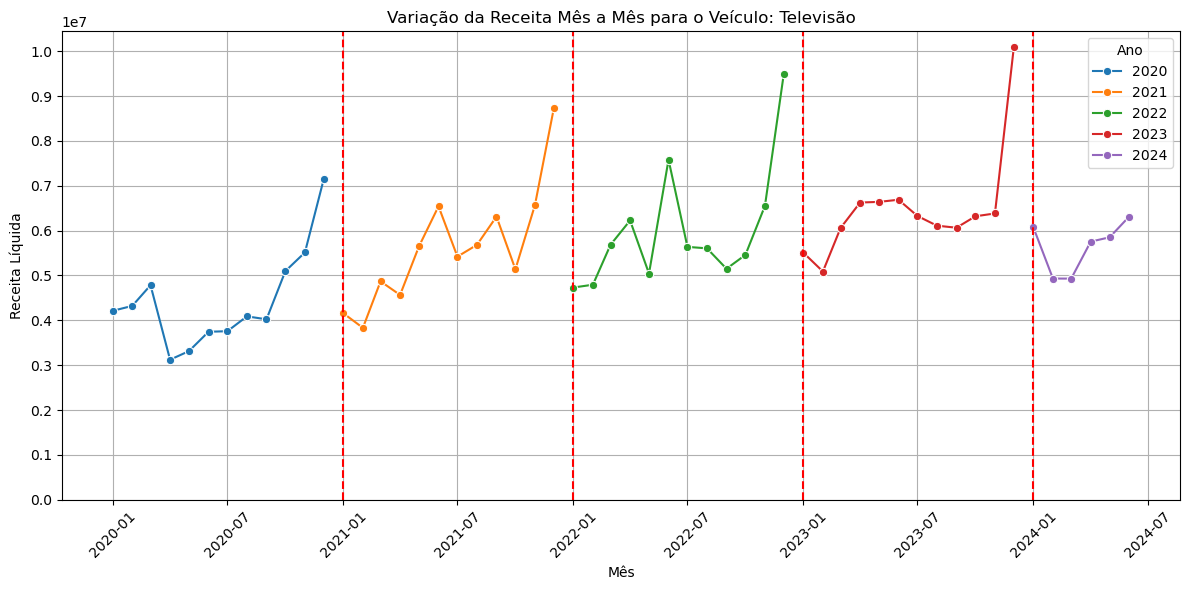

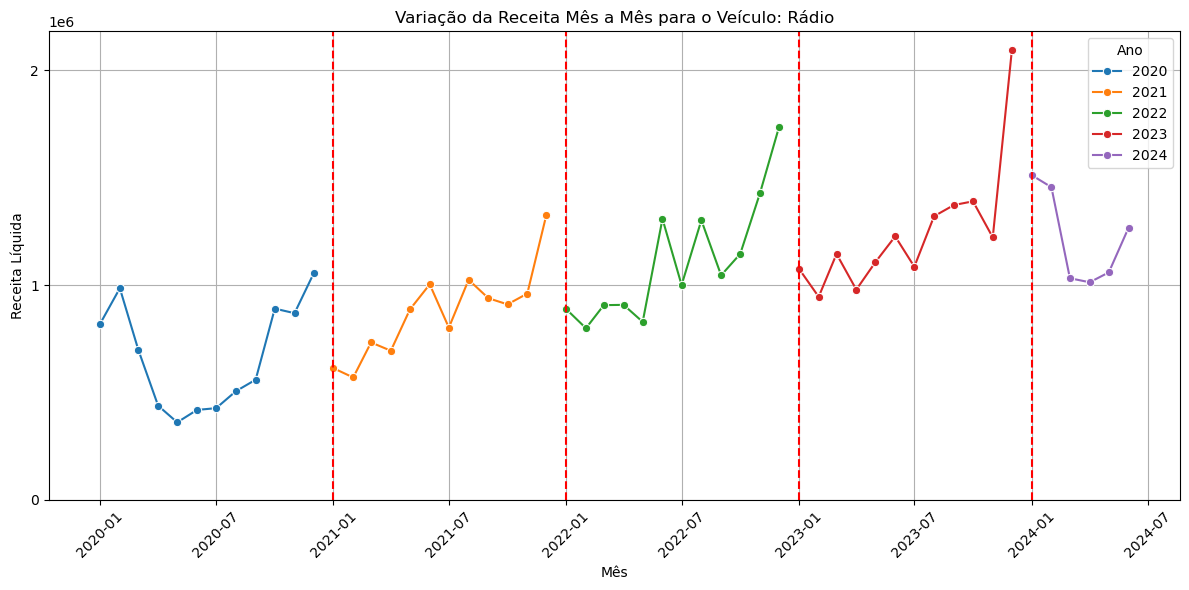

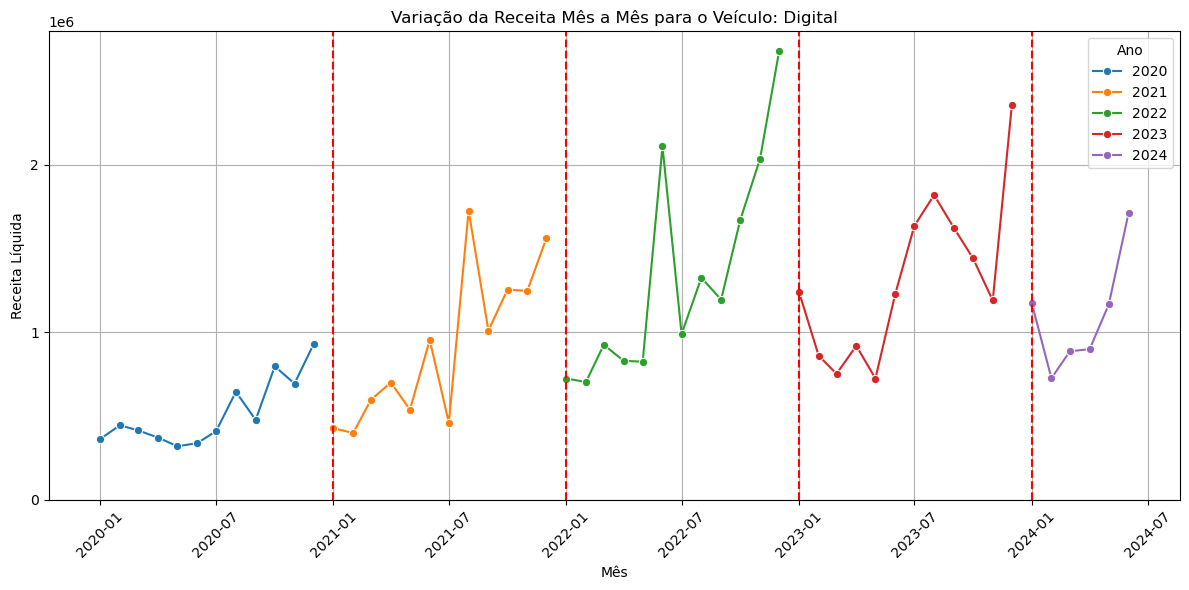

In [442]:
veiculos = df['UEN'].unique()
for veiculo in veiculos:
    dados_veiculo = {
        'Mês': [],
        'Receita Líquida': []
    }
    for mes in df['Data'].astype(str).str[:7].unique():
        receita_mes = df.loc[df['UEN'] == veiculo, 'Vl Liquido Final'].where(df['Data'].astype(str).str[:7] == mes)
        receita_mes_total = receita_mes.sum()
        dados_veiculo['Mês'].append(mes)
        dados_veiculo['Receita Líquida'].append(receita_mes_total)
    dados_veiculo = pd.DataFrame(dados_veiculo)
    dados_veiculo['Mês'] = pd.to_datetime(dados_veiculo['Mês'], format='%Y-%m')
    dados_veiculo = dados_veiculo.sort_values('Mês').reset_index(drop=True)
    # Adicionando a coluna 'Ano' para facilitar a diferenciação
    dados_veiculo['Ano'] = dados_veiculo['Mês'].dt.year
    # Plotando o gráfico para o veículo específico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dados_veiculo, x='Mês', y='Receita Líquida', hue='Ano', palette='tab10', marker='o')
    # Configurações do gráfico
    plt.title(f'Variação da Receita Mês a Mês para o Veículo: {veiculo}')
    plt.xlabel('Mês')
    plt.ylabel('Receita Líquida')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, dados_veiculo['Receita Líquida'].max(), 1000000))
    plt.tight_layout()
    # Adicionando as linhas verticais de mudança de ano
    for i, row in dados_veiculo.iterrows():
        if i > 0 and row['Ano'] != dados_veiculo.loc[i-1, 'Ano']:
            plt.axvline(x=row['Mês'], color='red', linestyle='--')
    plt.legend(title='Ano')
    plt.show()

# Tabela Resumida

In [443]:
df_analise = df.drop(['Desconto R$', 'Desc %'], axis=1)

In [444]:
df.columns

Index(['UEN', 'Veiculo', 'Cliente', 'Origem', 'Setor', 'VL Tabela',
       'Desconto R$', 'Desc %', 'Vl Bruto', 'Vl Liquido Final', 'Data',
       'IPCA BR', 'IPCA ES', 'Taxa Ac. TRI % PIB',
       'PMC - Número-índice (2022=100) (Número-índice)/ ES',
       'PMC - Número-índice (2022=100) (Número-índice)/ BR',
       'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES',
       'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR',
       'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES',
       'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR'],
      dtype='object')

In [445]:
contratos = df_analise['Data'].value_counts()
df_geral = df_analise.groupby(['Data']).agg({
    'UEN':'nunique',
    'Veiculo': 'nunique',
    'Origem': 'nunique',
    'Setor': 'nunique',
    'Cliente': 'nunique',
    'Vl Liquido Final':'sum'     
}).reset_index()
df_geral = df_geral.merge(contratos, on='Data')
df_geral.rename(columns={'count': 'Contratos'}, inplace=True)
df_geral.head()

,Data,UEN,Veiculo,Origem,Setor,Cliente,Vl Liquido Final,Contratos
0,2020-01-01,3,19,6,33,583,5393691.53,905
1,2020-02-01,3,19,6,39,559,5751548.26,899
2,2020-03-01,3,19,6,36,558,5894599.74,872
3,2020-04-01,3,18,6,36,442,3931148.87,629
4,2020-05-01,3,19,6,31,371,3993915.02,585


In [446]:
df_geral.to_csv('df_geral.csv', index=False)

In [447]:
df_analise.to_csv('df_analise.csv', index=False)

## Analise por Origem

In [448]:
df_analise.head()

,UEN,Veiculo,Cliente,Origem,Setor,VL Tabela,Vl Bruto,Vl Liquido Final,Data,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
0,Televisão,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,48120.0,48120.00,48120.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
1,Televisão,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,PREST DE SERVICOS,14477.0,9410.05,9410.05,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
2,Televisão,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,PREST DE SERVICOS,4000.0,4000.00,4000.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8
3,Televisão,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,LOJA VAREJISTA/ATAC,33871.0,18631.50,18631.50,2022-12-01,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,-0.7,-1.5
4,Televisão,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS PUBLICOS,12980.0,12980.00,12980.00,2022-04-01,1.06,0.83,2.7,97.10915,96.98576,101.20755,100.48572,0.7,0.8


In [449]:
# Criar uma nova coluna com o ano e mês
df['AnoMes'] = df['Data'].dt.to_period('M')

In [450]:
# Criar uma nova coluna com o ano e mês
df['AnoMes'] = df['Data'].dt.to_period('M')

# Agregar os dados com as operações desejadas
df_analise_origem = df.groupby(['AnoMes', 'Origem']).agg({
    'VL Tabela': 'sum',
    'Vl Bruto': 'sum',
    'Vl Liquido Final': 'sum',
    'Cliente': 'nunique',                 # Quantidade de clientes diferentes
    'Veiculo': 'nunique',                 # Quantidade de veículos diferentes
    'UEN': 'nunique',                     # Quantidade de UENs diferentes
    'Setor': 'nunique',                   # Quantidade de setores diferentes
    'IPCA BR': 'mean',
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR': 'mean',
}).reset_index()

# Adicionar a contagem de contratos (ocorrências) para cada Origem
df_analise_origem['Contratos'] = df.groupby(['AnoMes', 'Origem'])['Origem'].transform('count')

# Renomear as colunas para deixar os nomes mais claros e evitar conflito de nome
df_analise_origem.rename(columns={
    'Cliente': 'Clientes',
    'Veiculo': 'Veiculos',
    'UEN': 'UENs',
    'Setor': 'Setores'
}, inplace=True)

df_analise_origem.head()

,AnoMes,Origem,VL Tabela,Vl Bruto,Vl Liquido Final,Clientes,Veiculos,UENs,Setores,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR",Contratos
0,2020-01,CH - CONTATO - CACHOEIRO,1021245.74,740082.18,631609.24,84,8,3,13,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9,143
1,2020-01,CO - CONTATO - COLATINA,854308.38,612817.41,504076.48,114,12,3,14,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9,800
2,2020-01,LI - CONTATO - LINHARES,1285468.01,858277.51,722756.52,113,12,3,16,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9,134
3,2020-01,MP - MÍDIA PROGRAMÁTICA,269999.31,269999.31,269999.31,10,2,2,5,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9,800
4,2020-01,RN - MERCADO NACIONAL,214945.46,153579.54,120249.73,26,7,2,11,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9,143


In [451]:
for c in df_analise_origem.columns:
    qtd_null = df_analise_origem['Origem'].isnull().sum()
    print(f'{c} quantidade de nulos: {qtd_null}')

AnoMes quantidade de nulos: 0
Origem quantidade de nulos: 0
VL Tabela quantidade de nulos: 0
Vl Bruto quantidade de nulos: 0
Vl Liquido Final quantidade de nulos: 0
Clientes quantidade de nulos: 0
Veiculos quantidade de nulos: 0
UENs quantidade de nulos: 0
Setores quantidade de nulos: 0
IPCA BR quantidade de nulos: 0
IPCA ES quantidade de nulos: 0
Taxa Ac. TRI % PIB quantidade de nulos: 0
PMC - Número-índice (2022=100) (Número-índice)/ ES quantidade de nulos: 0
PMC - Número-índice (2022=100) (Número-índice)/ BR quantidade de nulos: 0
PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES quantidade de nulos: 0
PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR quantidade de nulos: 0
PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES quantidade de nulos: 0
PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR quantidade de nulos: 0
Contratos quantidade de nulos: 0


In [452]:
df_analise_origem['Origem'].value_counts()

Origem
CH - CONTATO - CACHOEIRO    54
CO - CONTATO - COLATINA     54
LI - CONTATO - LINHARES     54
MP - MÍDIA PROGRAMÁTICA     54
RN - MERCADO NACIONAL       54
VT - CONTATO - VITÓRIA      54
Name: count, dtype: int64

### Tabela de Dados por Origem

In [453]:
df_analise_origem_CH = df_analise_origem[df_analise_origem['Origem']== 'CH - CONTATO - CACHOEIRO']

In [454]:
df_analise_origem_CH.to_csv('df_analise_origem_CH.csv', index=False)

In [455]:
df_analise_origem_CO = df_analise_origem[df_analise_origem['Origem']== 'CO - CONTATO - COLATINA']

In [456]:
df_analise_origem_CO.to_csv('df_analise_origem_CO.csv', index=False)

In [457]:
df_analise_origem_LI = df_analise_origem[df_analise_origem['Origem']== 'LI - CONTATO - LINHARES']

In [458]:
df_analise_origem_LI.to_csv('df_analise_origem_LI.csv', index=False)

In [459]:
df_analise_origem_MP = df_analise_origem[df_analise_origem['Origem']== 'MP - MÍDIA PROGRAMÁTICA']

In [460]:
df_analise_origem_MP.to_csv('df_analise_origem_MP.csv', index=False)

In [461]:
df_analise_origem_RN = df_analise_origem[df_analise_origem['Origem']== 'RN - MERCADO NACIONAL']

In [462]:
df_analise_origem_RN.to_csv('df_analise_origem_RN.csv', index=False)

In [463]:
df_analise_origem_VT = df_analise_origem[df_analise_origem['Origem']== 'VT - CONTATO - VITÓRIA']

In [464]:
df_analise_origem_VT.to_csv('df_analise_origem_VT.csv', index=False)

## Analise por UEN

In [465]:
df_radio = df_analise[df_analise['UEN'] == 'Rádio']
df_televisao = df_analise[df_analise['UEN'] == 'Televisão']
df_digital = df_analise[df_analise['UEN'] == 'Digital']

## Rádio

In [466]:
total_contratos = df_radio['Data'].value_counts()

In [467]:
#Agrupamento mensal por 'Cliente' mantendo o 'Setor'
df_radio = df_radio.groupby(['Data']).agg({
    'VL Tabela': 'sum',
    'Vl Bruto': 'sum',
    'Vl Liquido Final': 'sum',
    'Cliente': 'nunique',
    'Setor': pd.Series.nunique,
    'Origem': 'nunique',
    'IPCA BR': 'mean',
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR': 'mean'
}).reset_index()
df_radio = df_radio.merge(total_contratos, on='Data')
df_radio.rename(columns={'count': 'Contratos'}, inplace=True)


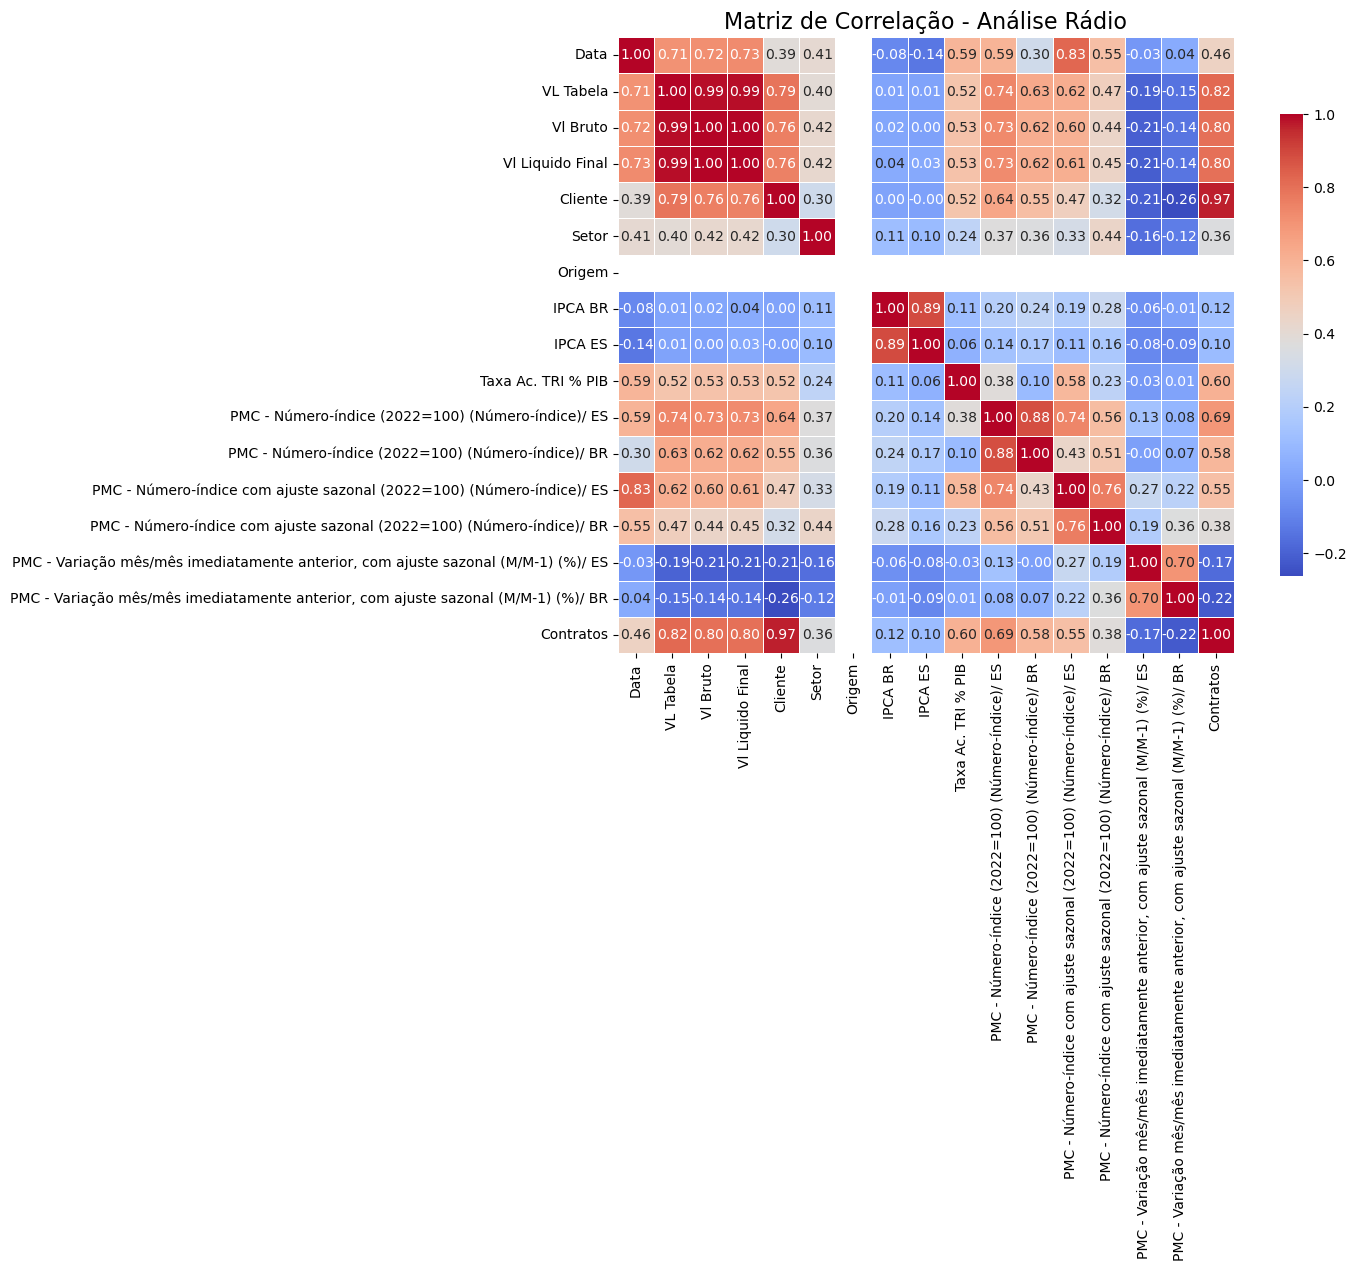

In [468]:
# Calcula a matriz de correlação
correlation_matrix = df_radio.corr()
# Configura o tamanho da figura
plt.figure(figsize=(12, 8))
# Cria o heatmap usando seaborn
sns.heatmap(correlation_matrix,
            annot=True,           # Mostra os valores na matriz
            fmt=".2f",            # Formato dos números
            cmap='coolwarm',      # Escolhe a paleta de cores
            linewidths=0.5,       # Largura das linhas que separam os quadrados
            square=True,          # Quadrados perfeitos
            cbar_kws={"shrink": .75})  # Ajuste do tamanho da barra de cores
# Título do gráfico
plt.title('Matriz de Correlação - Análise Rádio', fontsize=16)
# Exibe o gráfico
plt.show()

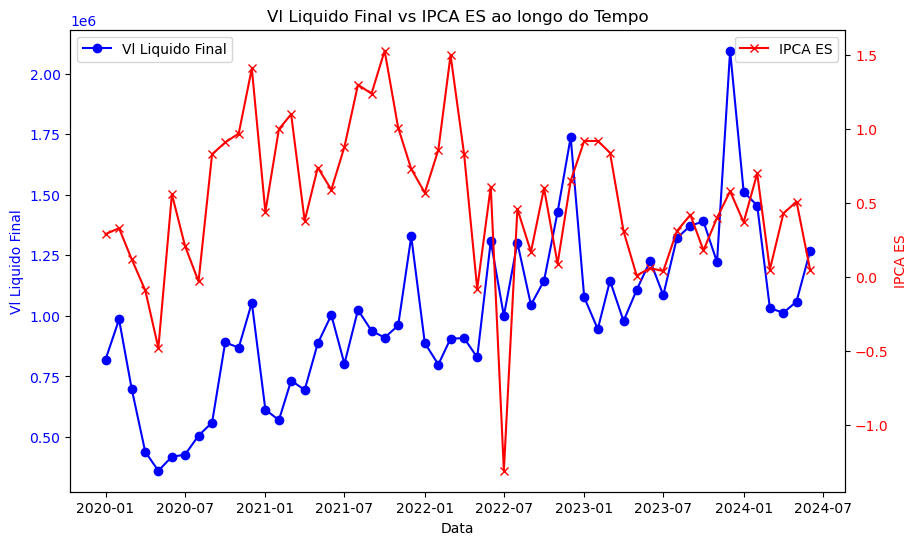

In [469]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot do primeiro eixo y (Vl Liquido Final)
ax1.plot(df_radio['Data'], df_radio['Vl Liquido Final'], color='blue', marker='o', label='Vl Liquido Final')
ax1.set_xlabel('Data')  # Rótulo do eixo x
ax1.set_ylabel('Vl Liquido Final', color='blue')  # Rótulo do eixo y esquerdo
ax1.tick_params(axis='y', labelcolor='blue')  # Cor dos rótulos do eixo y esquerdo

# Criação do segundo eixo y
ax2 = ax1.twinx()
ax2.plot(df_radio['Data'], df_radio['IPCA ES'], color='red', marker='x', label='IPCA ES')
ax2.set_ylabel('IPCA ES', color='red')  # Rótulo do eixo y direito
ax2.tick_params(axis='y', labelcolor='red')  # Cor dos rótulos do eixo y direito

# Título do gráfico
plt.title('Vl Liquido Final vs IPCA ES ao longo do Tempo')

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibe o gráfico
plt.show()

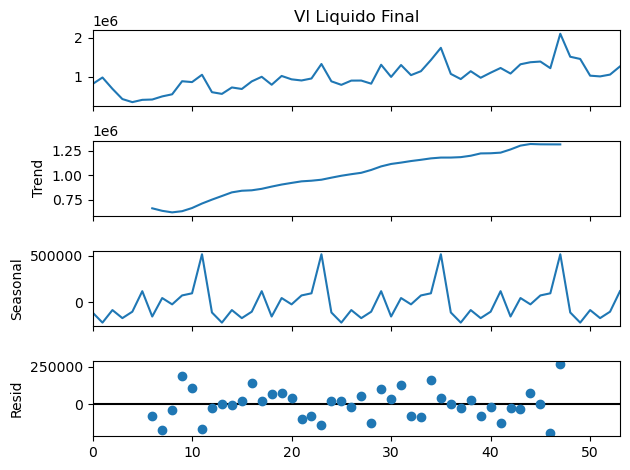

In [470]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df_radio['Vl Liquido Final'], period=12)

# Plot the decomposed components
decomposed.plot()
plt.show()

In [471]:
df_radio.dropna(inplace=True)

In [472]:
df_radio.to_csv('df_radio.csv')

## Digital

In [473]:
total_contratos = df_digital['Data'].value_counts()

In [474]:
#Agrupamento mensal por 'Cliente' mantendo o 'Setor'
df_digital = df_digital.groupby(['Data']).agg({
    'VL Tabela': 'sum',
    'Vl Bruto': 'sum',
    'Vl Liquido Final': 'sum',
    'Cliente': 'nunique',
    'Setor': pd.Series.nunique,
    'IPCA BR': 'mean',
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR': 'mean'
}).reset_index()
df_digital = df_digital.merge(total_contratos, on='Data')
df_digital.rename(columns={'count': 'Contratos'}, inplace=True)


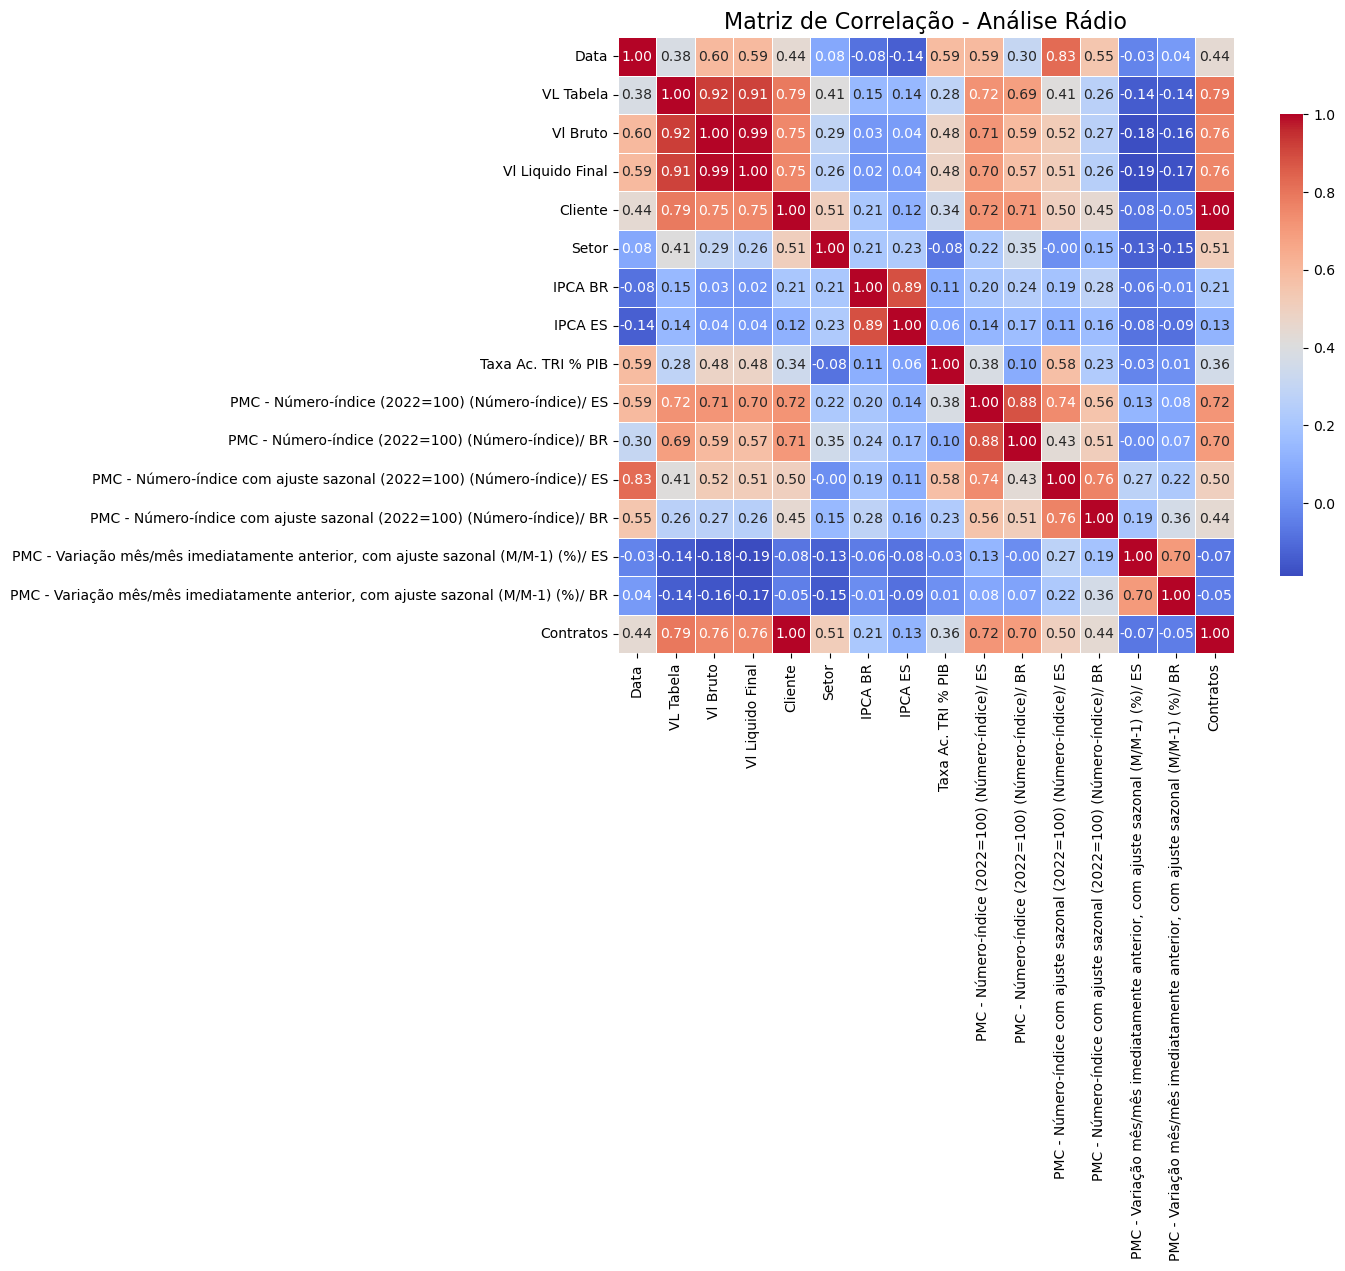

In [475]:
# Calcula a matriz de correlação
correlation_matrix = df_digital.corr()
# Configura o tamanho da figura
plt.figure(figsize=(12, 8))
# Cria o heatmap usando seaborn
sns.heatmap(correlation_matrix,
            annot=True,           # Mostra os valores na matriz
            fmt=".2f",            # Formato dos números
            cmap='coolwarm',      # Escolhe a paleta de cores
            linewidths=0.5,       # Largura das linhas que separam os quadrados
            square=True,          # Quadrados perfeitos
            cbar_kws={"shrink": .75})  # Ajuste do tamanho da barra de cores
# Título do gráfico
plt.title('Matriz de Correlação - Análise Rádio', fontsize=16)
# Exibe o gráfico
plt.show()

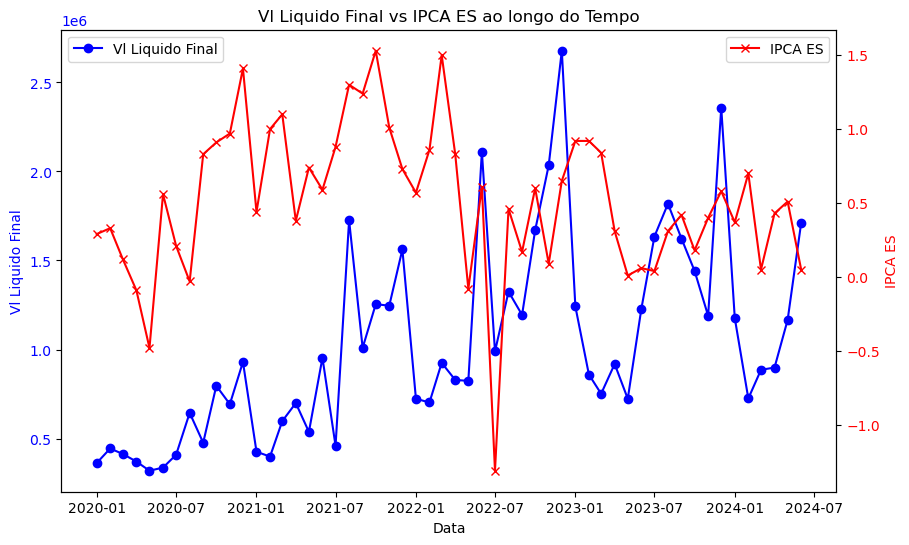

In [476]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot do primeiro eixo y (Vl Liquido Final)
ax1.plot(df_digital['Data'], df_digital['Vl Liquido Final'], color='blue', marker='o', label='Vl Liquido Final')
ax1.set_xlabel('Data')  # Rótulo do eixo x
ax1.set_ylabel('Vl Liquido Final', color='blue')  # Rótulo do eixo y esquerdo
ax1.tick_params(axis='y', labelcolor='blue')  # Cor dos rótulos do eixo y esquerdo

# Criação do segundo eixo y
ax2 = ax1.twinx()
ax2.plot(df_digital['Data'], df_digital['IPCA ES'], color='red', marker='x', label='IPCA ES')
ax2.set_ylabel('IPCA ES', color='red')  # Rótulo do eixo y direito
ax2.tick_params(axis='y', labelcolor='red')  # Cor dos rótulos do eixo y direito

# Título do gráfico
plt.title('Vl Liquido Final vs IPCA ES ao longo do Tempo')

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibe o gráfico
plt.show()

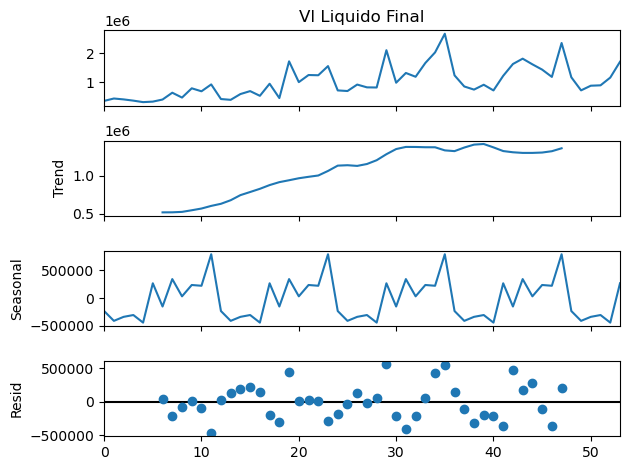

In [477]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df_digital['Vl Liquido Final'], period=12)

# Plot the decomposed components
decomposed.plot()
plt.show()

In [478]:
df_digital.dropna(inplace=True)

In [479]:
df_digital.to_csv('df_digital.csv')

## Televisão

In [480]:
total_contratos = df_digital['Data'].value_counts()

In [481]:
#Agrupamento mensal por 'Cliente' mantendo o 'Setor'
df_televisao = df_televisao.groupby(['Data']).agg({
    'VL Tabela': 'sum',
    'Vl Bruto': 'sum',
    'Vl Liquido Final': 'sum',
    'Cliente': 'nunique',
    'Setor': pd.Series.nunique,
    'IPCA BR': 'mean',
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES': 'mean',
    'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR': 'mean'
}).reset_index()
df_televisao = df_televisao.merge(total_contratos, on='Data')
df_televisao.rename(columns={'count': 'Contratos'}, inplace=True)


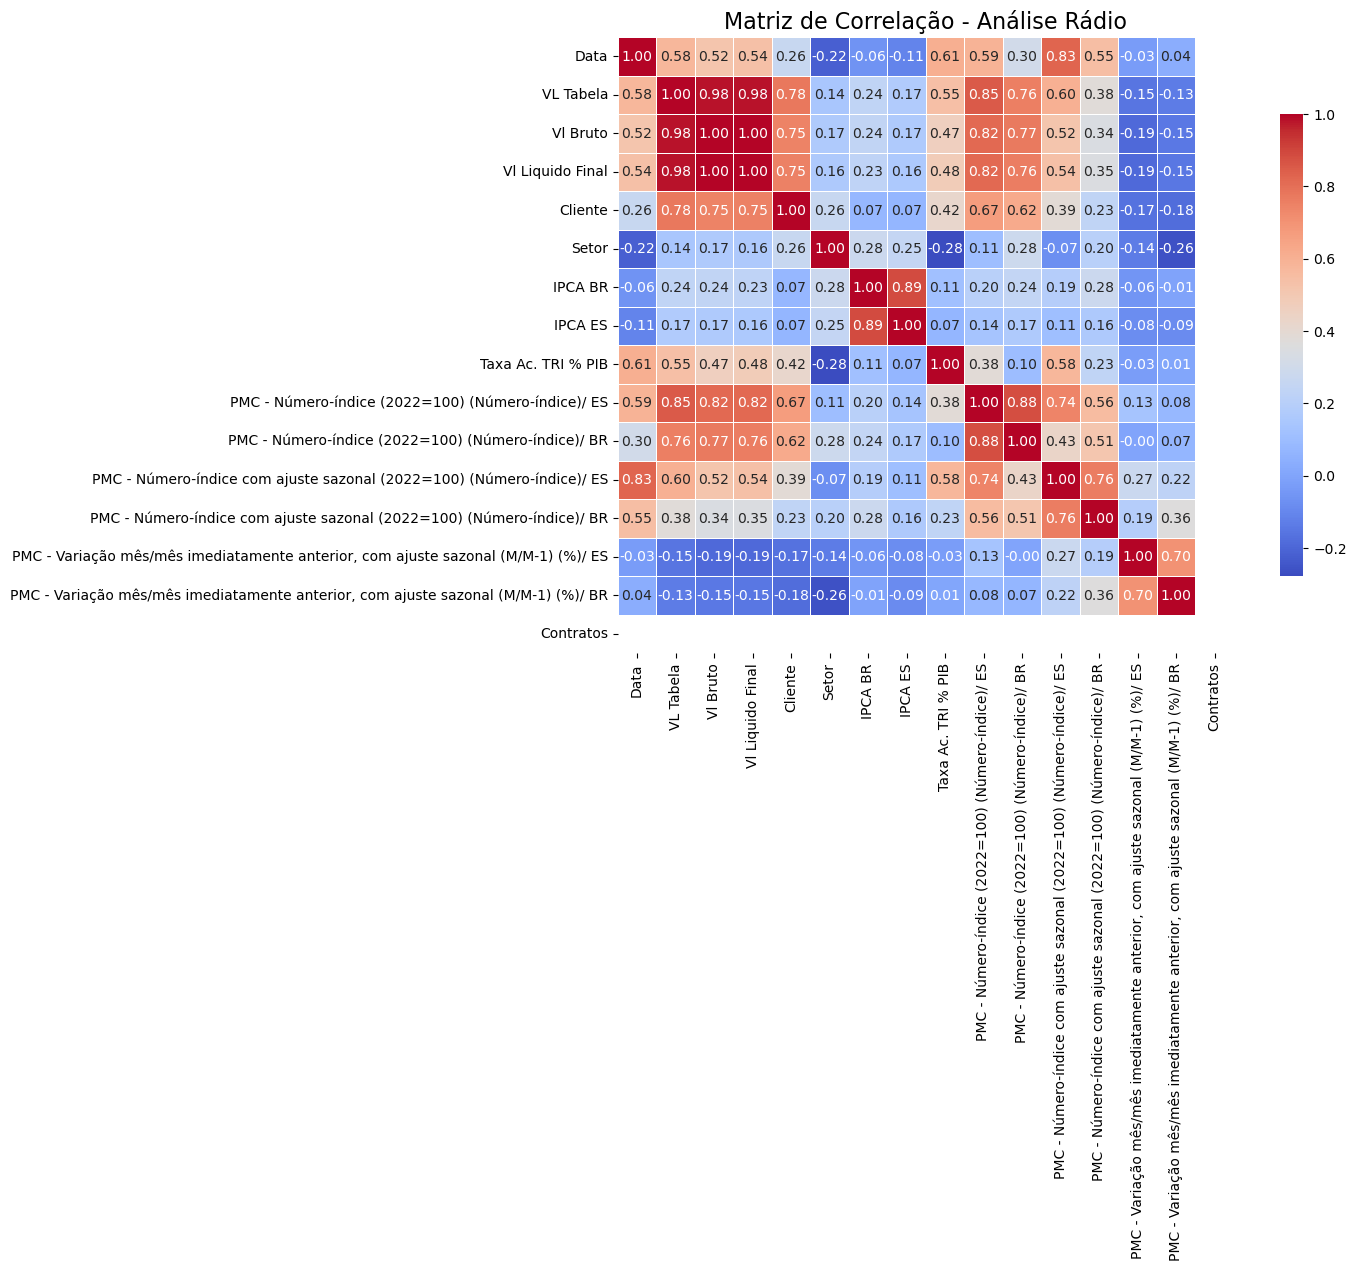

In [482]:
# Calcula a matriz de correlação
correlation_matrix = df_televisao.corr()
# Configura o tamanho da figura
plt.figure(figsize=(12, 8))
# Cria o heatmap usando seaborn
sns.heatmap(correlation_matrix,
            annot=True,           # Mostra os valores na matriz
            fmt=".2f",            # Formato dos números
            cmap='coolwarm',      # Escolhe a paleta de cores
            linewidths=0.5,       # Largura das linhas que separam os quadrados
            square=True,          # Quadrados perfeitos
            cbar_kws={"shrink": .75})  # Ajuste do tamanho da barra de cores
# Título do gráfico
plt.title('Matriz de Correlação - Análise Rádio', fontsize=16)
# Exibe o gráfico
plt.show()

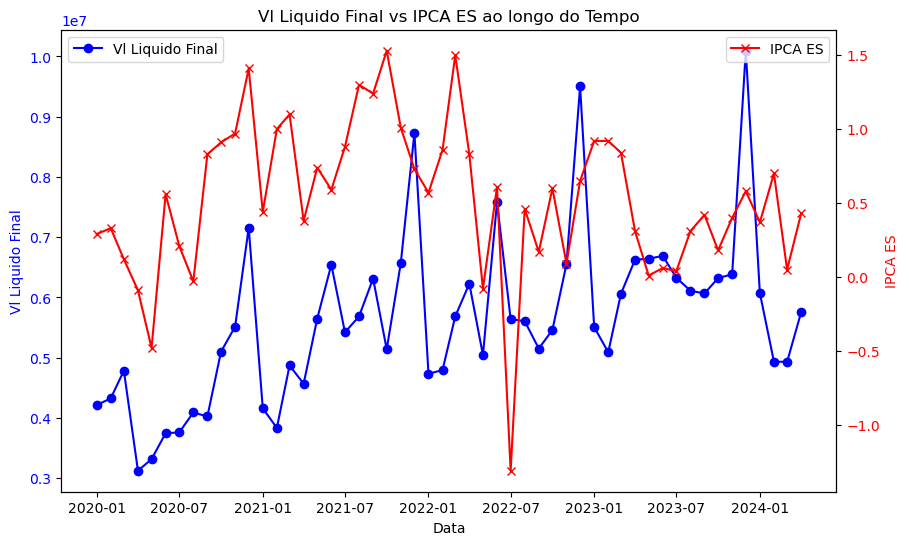

In [483]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot do primeiro eixo y (Vl Liquido Final)
ax1.plot(df_televisao['Data'], df_televisao['Vl Liquido Final'], color='blue', marker='o', label='Vl Liquido Final')
ax1.set_xlabel('Data')  # Rótulo do eixo x
ax1.set_ylabel('Vl Liquido Final', color='blue')  # Rótulo do eixo y esquerdo
ax1.tick_params(axis='y', labelcolor='blue')  # Cor dos rótulos do eixo y esquerdo

# Criação do segundo eixo y
ax2 = ax1.twinx()
ax2.plot(df_televisao['Data'], df_televisao['IPCA ES'], color='red', marker='x', label='IPCA ES')
ax2.set_ylabel('IPCA ES', color='red')  # Rótulo do eixo y direito
ax2.tick_params(axis='y', labelcolor='red')  # Cor dos rótulos do eixo y direito

# Título do gráfico
plt.title('Vl Liquido Final vs IPCA ES ao longo do Tempo')

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibe o gráfico
plt.show()

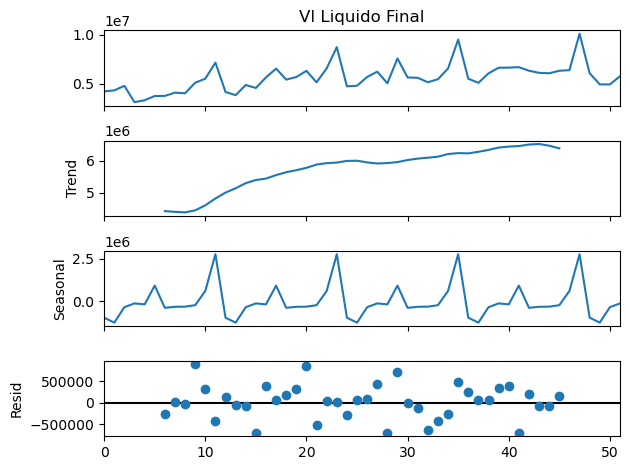

In [484]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df_televisao['Vl Liquido Final'], period=12)

# Plot the decomposed components
decomposed.plot()
plt.show()

In [485]:
df_televisao.dropna(inplace=True)

In [486]:
df_televisao.to_csv('df_televisao.csv')

## Analises

In [487]:
dataframes = [df_radio, df_digital, df_televisao]

# Loop para ajustar o índice e converter PeriodIndex para Timestamp, se necessário
for df in dataframes:
    # Define a coluna 'Data' como índice
    df.set_index('Data', inplace=True)
    
    # Converte PeriodIndex para Timestamp se for o caso
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()

Treinando modelo para Rádio...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: V

Mean Absolute Error (MAE): 898565.81
Root Mean Squared Error (RMSE): 943208.57
Mean Absolute Percentage Error (MAPE): 72.25%
R-squared (R²): -9.74


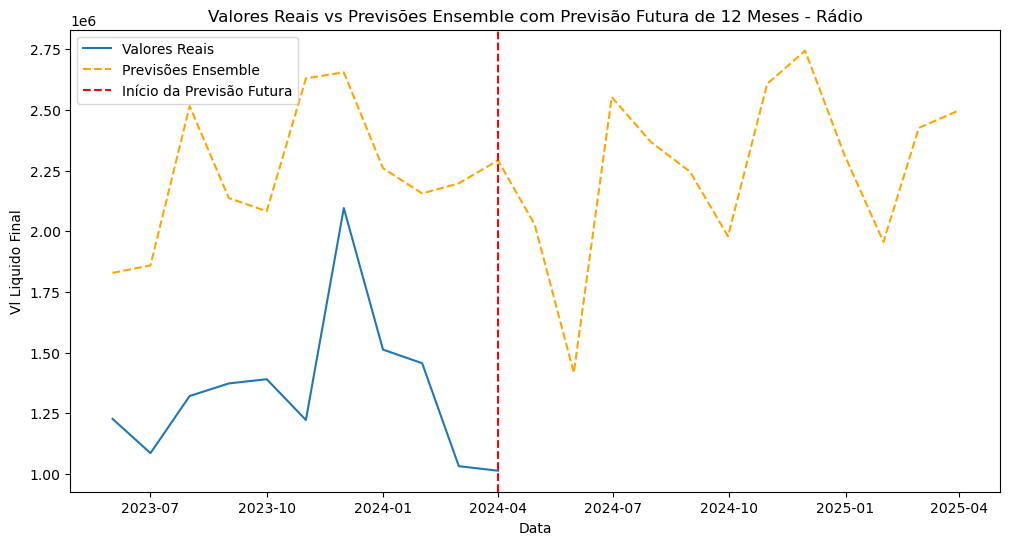

Treinando modelo para Digital...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: V

Mean Absolute Error (MAE): 1380813.03
Root Mean Squared Error (RMSE): 1696939.28
Mean Absolute Percentage Error (MAPE): 117.80%
R-squared (R²): -12.89


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/4277716387.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


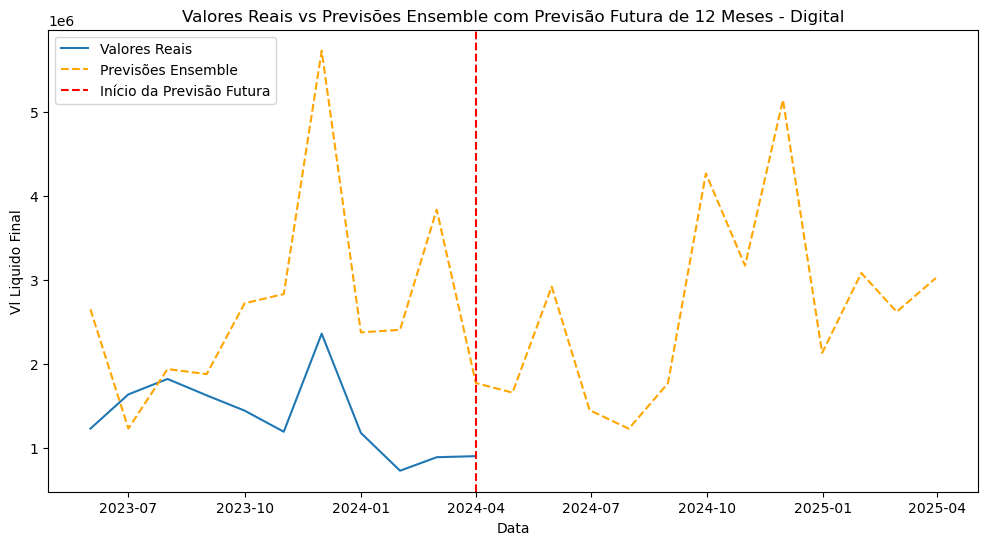

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Televisão...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizatio

Mean Absolute Error (MAE): 3541225.39
Root Mean Squared Error (RMSE): 3693484.93
Mean Absolute Percentage Error (MAPE): 59.57%
R-squared (R²): -7.01


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/4277716387.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


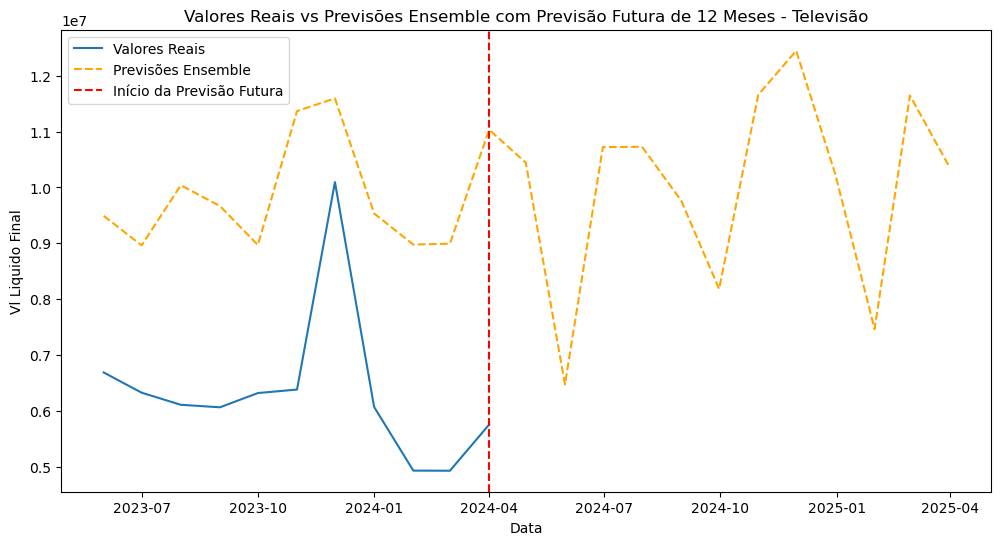

In [488]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lista de DataFrames
dataframes = [df_radio, df_digital, df_televisao]

# Função para treinar e avaliar o modelo SARIMAX
def train_and_evaluate_sarimax(df, name):
    print(f"Treinando modelo para {name}...")
    
    # Selecione as features (todas as colunas menos 'Vl Liquido Final', 'VL Tabela', 'Vl Bruto')
    X = df.drop(columns=['Vl Liquido Final', 'Vl Bruto', 'VL Tabela'])
    y = df['Vl Liquido Final']

    # Divida os dados em treinamento e teste
    train_size = int(len(y) * 0.8)
    train_X, test_X = X[:train_size], X[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    # Treinando múltiplos modelos SARIMAX com diferentes parâmetros
    model_1 = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_1_fit = model_1.fit(disp=False)

    model_2 = SARIMAX(train_y, exog=train_X, order=(2, 1, 2), seasonal_order=(1, 1, 0, 12))
    model_2_fit = model_2.fit(disp=False)

    model_3 = SARIMAX(train_y, exog=train_X, order=(0, 2, 0), seasonal_order=(0, 2, 1, 12))
    model_3_fit = model_3.fit(disp=False)

    # Previsão no conjunto de teste com cada modelo
    forecast_test_1 = model_1_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_2 = model_2_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_3 = model_3_fit.forecast(steps=len(test_y), exog=test_X)

    # Média das previsões (ensemble)
    ensemble_forecast_test = (forecast_test_1 + forecast_test_2 + forecast_test_3) / 3

    # Previsão futura de 12 meses
    future_steps = 12
    future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')
    future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

    forecast_future_1 = model_1_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_2 = model_2_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_3 = model_3_fit.forecast(steps=future_steps, exog=future_X)

    ensemble_forecast_future = (forecast_future_1 + forecast_future_2 + forecast_future_3) / 3

    # Combine previsões de teste e futuras
    all_forecast = np.concatenate([ensemble_forecast_test, ensemble_forecast_future])
    all_dates = test_y.index.append(future_dates)

    # Calcule as métricas de avaliação
    mae = mean_absolute_error(test_y, ensemble_forecast_test)
    rmse = np.sqrt(mean_squared_error(test_y, ensemble_forecast_test))
    mape = np.mean(np.abs((test_y - ensemble_forecast_test) / test_y)) * 100
    r2 = r2_score(test_y, ensemble_forecast_test)

    # Exiba as métricas
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

    # Plotando os valores reais, as previsões e a previsão futura
    plt.figure(figsize=(12, 6))
    plt.plot(test_y.index, test_y, label='Valores Reais')
    plt.plot(all_dates, all_forecast, label='Previsões Ensemble', linestyle='--', color='orange')
    plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
    plt.xlabel('Data')
    plt.ylabel('Vl Liquido Final')
    plt.title(f'Valores Reais vs Previsões Ensemble com Previsão Futura de 12 Meses - {name}')
    plt.legend()
    plt.show()

# Iterar sobre cada DataFrame e aplicar a função
for df, name in zip(dataframes, ['Rádio', 'Digital', 'Televisão']):
    train_and_evaluate_sarimax(df, name)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Rádio...
Mean Absolute Error (MAE): 192676.82
Root Mean Squared Error (RMSE): 254298.34
Mean Absolute Percentage Error (MAPE): 13.09%
R-squared (R²): 0.22


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


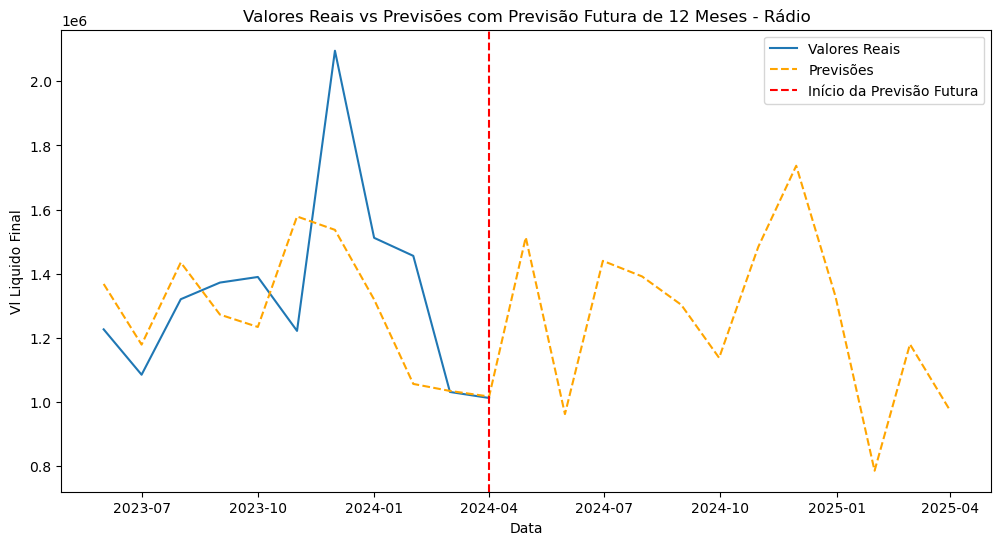

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Digital...
Mean Absolute Error (MAE): 469491.72
Root Mean Squared Error (RMSE): 545228.79
Mean Absolute Percentage Error (MAPE): 37.05%
R-squared (R²): -0.43


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


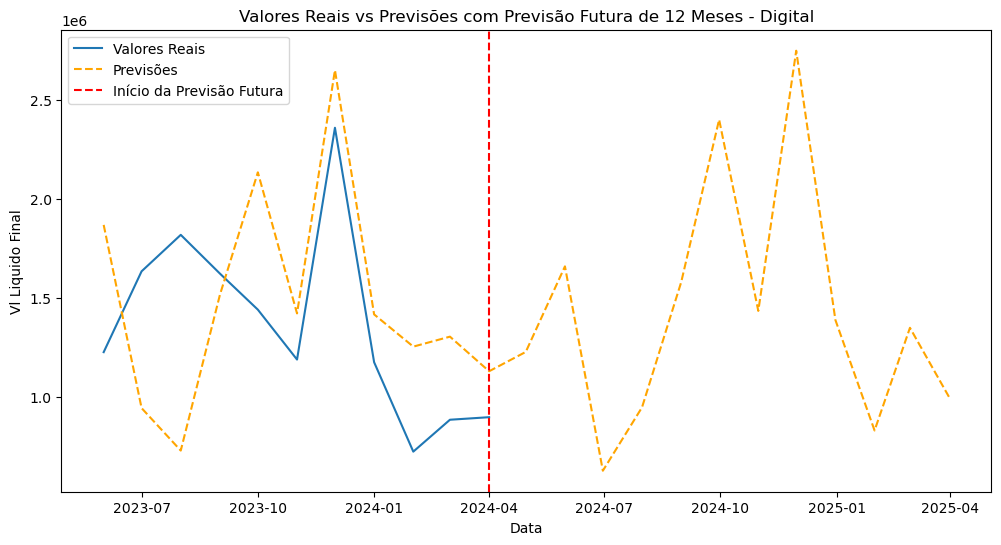

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Televisão...
Mean Absolute Error (MAE): 1422052.17
Root Mean Squared Error (RMSE): 1505183.67
Mean Absolute Percentage Error (MAPE): 23.88%
R-squared (R²): -0.33


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


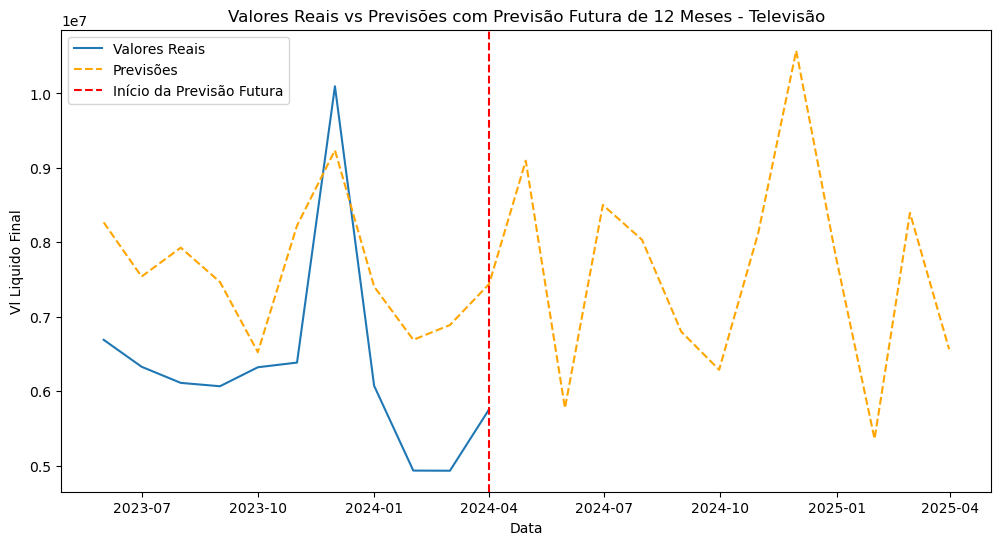

In [489]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lista de DataFrames
dataframes = [df_radio, df_digital, df_televisao]

# Função para treinar e avaliar o modelo SARIMAX
def train_and_evaluate_sarimax(df, name):
    print(f"Treinando modelo para {name}...")

    # Selecione as features (todas as colunas menos 'Vl Liquido Final', 'VL Tabela', 'Vl Bruto')
    X = df.drop(columns=['Vl Liquido Final', 'Vl Bruto', 'VL Tabela'])
    y = df['Vl Liquido Final']

    # Divida os dados em treinamento e teste
    train_size = int(len(y) * 0.8)
    train_X, test_X = X[:train_size], X[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    # Crie e treine o modelo SARIMAX com variáveis exógenas
    model = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Previsão no conjunto de teste
    forecast_test = model_fit.forecast(steps=len(test_y), exog=test_X)

    # Previsão futura de 12 meses
    future_steps = 12
    future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')
    future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

    forecast_future = model_fit.forecast(steps=future_steps, exog=future_X)

    # Combine previsões de teste e futuras
    all_forecast = np.concatenate([forecast_test, forecast_future])
    all_dates = test_y.index.append(future_dates)

    # Calcule as métricas de avaliação
    mae = mean_absolute_error(test_y, forecast_test)
    rmse = np.sqrt(mean_squared_error(test_y, forecast_test))
    mape = np.mean(np.abs((test_y - forecast_test) / test_y)) * 100
    r2 = r2_score(test_y, forecast_test)

    # Exiba as métricas
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

    # Plotando os valores reais, as previsões e a previsão futura
    plt.figure(figsize=(12, 6))
    plt.plot(test_y.index, test_y, label='Valores Reais')
    plt.plot(all_dates, all_forecast, label='Previsões', linestyle='--', color='orange')
    plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
    plt.xlabel('Data')
    plt.ylabel('Vl Liquido Final')
    plt.title(f'Valores Reais vs Previsões com Previsão Futura de 12 Meses - {name}')
    plt.legend()
    plt.show()

# Iterar sobre cada DataFrame e aplicar a função
for df, name in zip(dataframes, ['Rádio', 'Digital', 'Televisão']):
    train_and_evaluate_sarimax(df, name)


In [490]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
dataframes = [df_radio, df_digital, df_televisao]

for df in dataframes:
    # Aplicar o MaxAbsScaler na coluna 'Vl Liquido Final'
    df['Vl Liquido Final'] = scaler.fit_transform(df[['Vl Liquido Final']])

Treinando modelo para Rádio...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/

Mean Absolute Error (MAE): 0.42
Root Mean Squared Error (RMSE): 0.44
Mean Absolute Percentage Error (MAPE): 70.06%
R-squared (R²): -9.07


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/4277716387.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


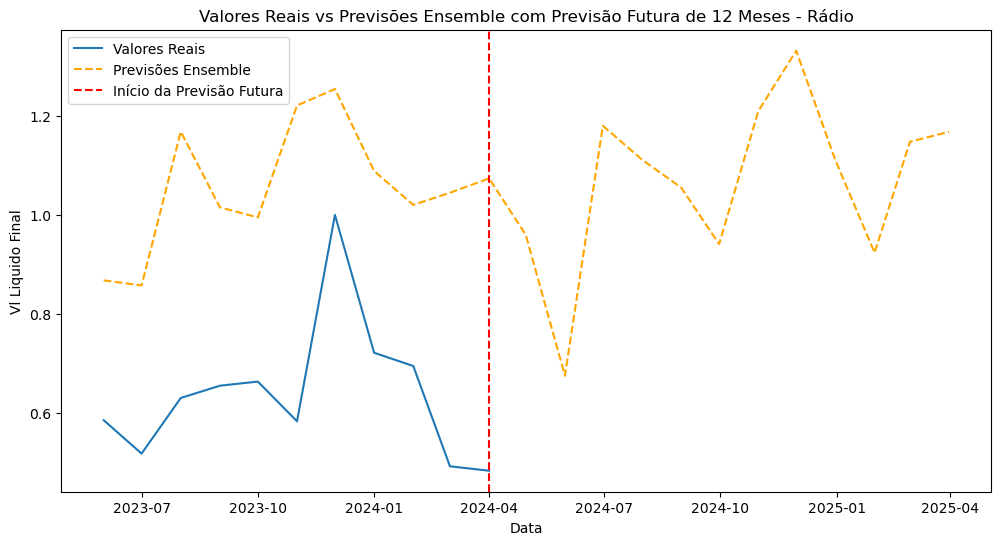

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Digital...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was

Mean Absolute Error (MAE): 0.50
Root Mean Squared Error (RMSE): 0.62
Mean Absolute Percentage Error (MAPE): 115.84%
R-squared (R²): -12.33


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/4277716387.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


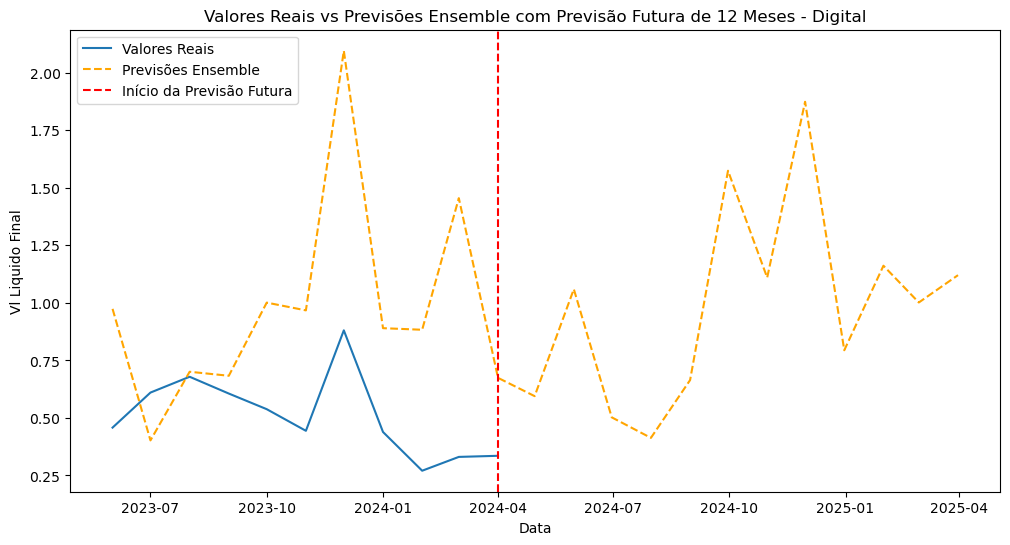

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Televisão...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizatio

Mean Absolute Error (MAE): 0.35
Root Mean Squared Error (RMSE): 0.36
Mean Absolute Percentage Error (MAPE): 59.03%
R-squared (R²): -6.94


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/4277716387.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


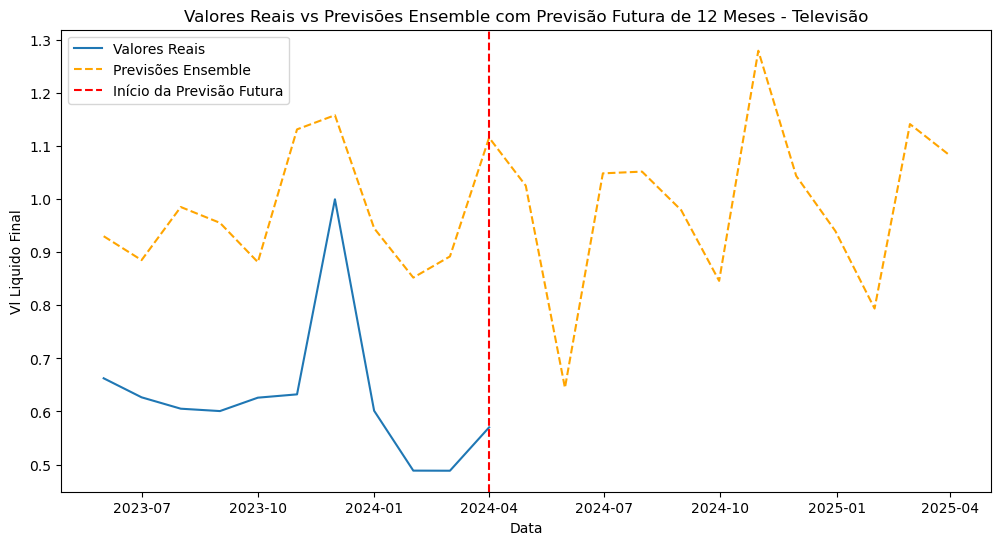

In [491]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lista de DataFrames
dataframes = [df_radio, df_digital, df_televisao]

# Função para treinar e avaliar o modelo SARIMAX
def train_and_evaluate_sarimax(df, name):
    print(f"Treinando modelo para {name}...")
    
    # Selecione as features (todas as colunas menos 'Vl Liquido Final', 'VL Tabela', 'Vl Bruto')
    X = df.drop(columns=['Vl Liquido Final', 'Vl Bruto', 'VL Tabela'])
    y = df['Vl Liquido Final']

    # Divida os dados em treinamento e teste
    train_size = int(len(y) * 0.8)
    train_X, test_X = X[:train_size], X[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    # Treinando múltiplos modelos SARIMAX com diferentes parâmetros
    model_1 = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_1_fit = model_1.fit(disp=False)

    model_2 = SARIMAX(train_y, exog=train_X, order=(2, 1, 2), seasonal_order=(1, 1, 0, 12))
    model_2_fit = model_2.fit(disp=False)

    model_3 = SARIMAX(train_y, exog=train_X, order=(0, 2, 0), seasonal_order=(0, 2, 1, 12))
    model_3_fit = model_3.fit(disp=False)

    # Previsão no conjunto de teste com cada modelo
    forecast_test_1 = model_1_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_2 = model_2_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_3 = model_3_fit.forecast(steps=len(test_y), exog=test_X)

    # Média das previsões (ensemble)
    ensemble_forecast_test = (forecast_test_1 + forecast_test_2 + forecast_test_3) / 3

    # Previsão futura de 12 meses
    future_steps = 12
    future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')
    future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

    forecast_future_1 = model_1_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_2 = model_2_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_3 = model_3_fit.forecast(steps=future_steps, exog=future_X)

    ensemble_forecast_future = (forecast_future_1 + forecast_future_2 + forecast_future_3) / 3

    # Combine previsões de teste e futuras
    all_forecast = np.concatenate([ensemble_forecast_test, ensemble_forecast_future])
    all_dates = test_y.index.append(future_dates)

    # Calcule as métricas de avaliação
    mae = mean_absolute_error(test_y, ensemble_forecast_test)
    rmse = np.sqrt(mean_squared_error(test_y, ensemble_forecast_test))
    mape = np.mean(np.abs((test_y - ensemble_forecast_test) / test_y)) * 100
    r2 = r2_score(test_y, ensemble_forecast_test)

    # Exiba as métricas
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

    # Plotando os valores reais, as previsões e a previsão futura
    plt.figure(figsize=(12, 6))
    plt.plot(test_y.index, test_y, label='Valores Reais')
    plt.plot(all_dates, all_forecast, label='Previsões Ensemble', linestyle='--', color='orange')
    plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
    plt.xlabel('Data')
    plt.ylabel('Vl Liquido Final')
    plt.title(f'Valores Reais vs Previsões Ensemble com Previsão Futura de 12 Meses - {name}')
    plt.legend()
    plt.show()

# Iterar sobre cada DataFrame e aplicar a função
for df, name in zip(dataframes, ['Rádio', 'Digital', 'Televisão']):
    train_and_evaluate_sarimax(df, name)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Rádio...
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.12
Mean Absolute Percentage Error (MAPE): 13.19%
R-squared (R²): 0.28


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


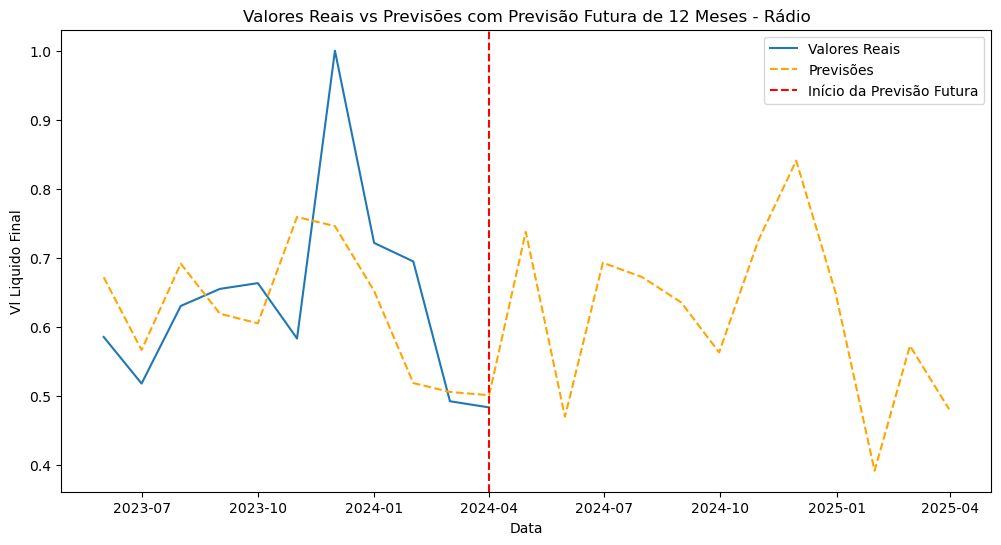

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Digital...
Mean Absolute Error (MAE): 0.18
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Percentage Error (MAPE): 37.01%
R-squared (R²): -0.43


/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


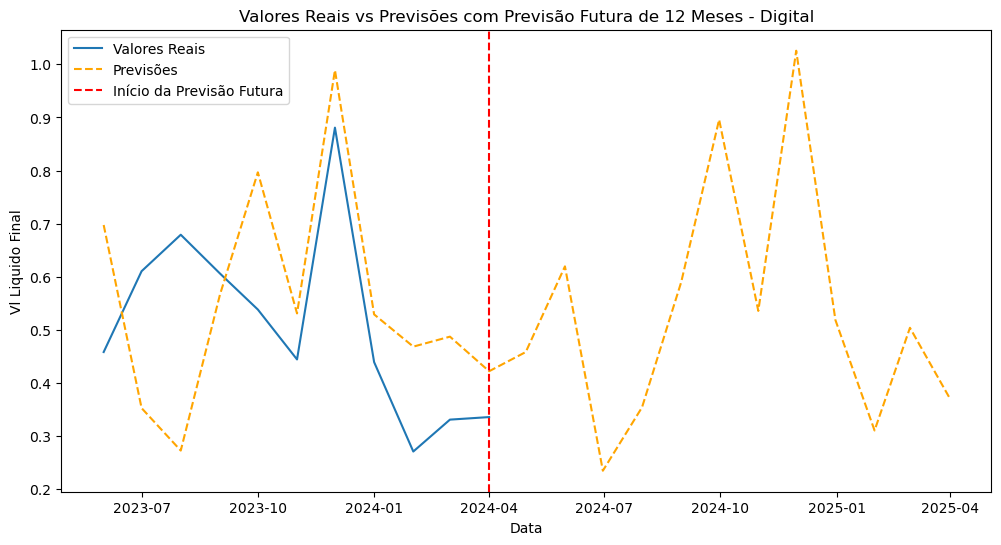

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Televisão...
Mean Absolute Error (MAE): 0.13
Root Mean Squared Error (RMSE): 0.14
Mean Absolute Percentage Error (MAPE): 21.39%
R-squared (R²): -0.12


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2r/grps0bns26n88l_zz3d0c55r0000gn/T/ipykernel_81272/1589472541.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')


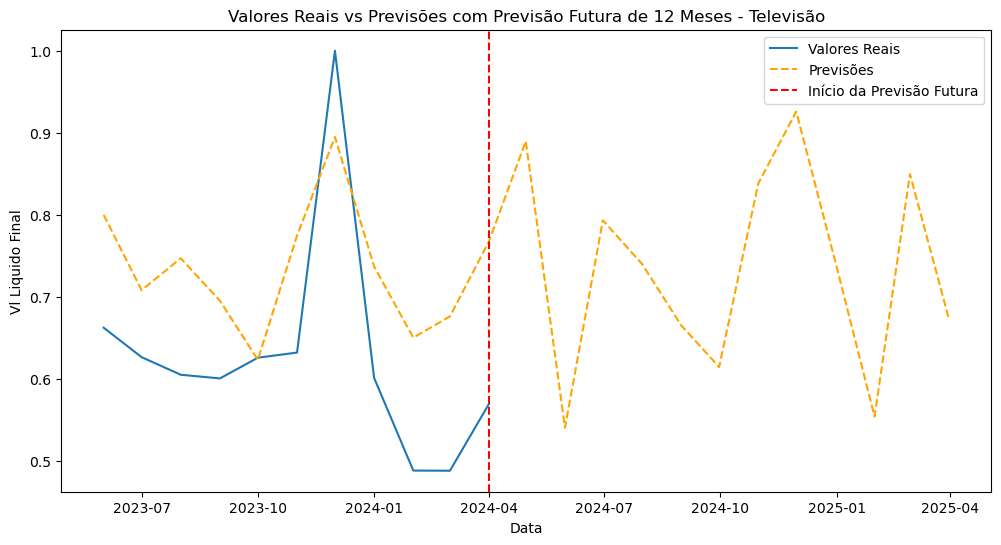

In [492]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lista de DataFrames
dataframes = [df_radio, df_digital, df_televisao]

# Função para treinar e avaliar o modelo SARIMAX
def train_and_evaluate_sarimax(df, name):
    print(f"Treinando modelo para {name}...")

    # Selecione as features (todas as colunas menos 'Vl Liquido Final', 'VL Tabela', 'Vl Bruto')
    X = df.drop(columns=['Vl Liquido Final', 'Vl Bruto', 'VL Tabela'])
    y = df['Vl Liquido Final']

    # Divida os dados em treinamento e teste
    train_size = int(len(y) * 0.8)
    train_X, test_X = X[:train_size], X[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    # Crie e treine o modelo SARIMAX com variáveis exógenas
    model = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Previsão no conjunto de teste
    forecast_test = model_fit.forecast(steps=len(test_y), exog=test_X)

    # Previsão futura de 12 meses
    future_steps = 12
    future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(1), periods=future_steps, freq='M')
    future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

    forecast_future = model_fit.forecast(steps=future_steps, exog=future_X)

    # Combine previsões de teste e futuras
    all_forecast = np.concatenate([forecast_test, forecast_future])
    all_dates = test_y.index.append(future_dates)

    # Calcule as métricas de avaliação
    mae = mean_absolute_error(test_y, forecast_test)
    rmse = np.sqrt(mean_squared_error(test_y, forecast_test))
    mape = np.mean(np.abs((test_y - forecast_test) / test_y)) * 100
    r2 = r2_score(test_y, forecast_test)

    # Exiba as métricas
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

    # Plotando os valores reais, as previsões e a previsão futura
    plt.figure(figsize=(12, 6))
    plt.plot(test_y.index, test_y, label='Valores Reais')
    plt.plot(all_dates, all_forecast, label='Previsões', linestyle='--', color='orange')
    plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
    plt.xlabel('Data')
    plt.ylabel('Vl Liquido Final')
    plt.title(f'Valores Reais vs Previsões com Previsão Futura de 12 Meses - {name}')
    plt.legend()
    plt.show()

# Iterar sobre cada DataFrame e aplicar a função
for df, name in zip(dataframes, ['Rádio', 'Digital', 'Televisão']):
    train_and_evaluate_sarimax(df, name)
